# Instituto Tecnológico de Costa Rica

### Escuela de Ingeniería en Computación

### Maestría Académica en Ciencias de la Computación

### Curso: Aprendizaje Automático (Machine Learning)

# Proyecto Final
- Agregar nombre del proyecto
## Estudiantes:
- Emmanuel Rosales Salas - 2013108931
- Alejandro Arroyo Valle - 2016108971

# Carga de Bibliotecas y Dataset

## Instalar las bibliotecas necesarias

In [1]:
%pip install -q numpy pandas matplotlib seaborn scikit-learn statsmodels pmdarima xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


## Importación de la clases

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

## Importar los datos.

In [2]:
raw_dataset = pd.read_csv('multi_data_01.csv', header = 0, parse_dates = [0], index_col = 0)
## Algunos datos estan desordenados, los ordenamos por fecha
raw_dataset = raw_dataset.sort_index()

# Exploración de Datos

## Contexto de los datos

![Texto alternativo](image005.png)
![Texto alternativo](drum_press.jpg)

Este dataset contiene datos de dos máquinas de producción, estas máquinas son prensas hidráulicas que bombean material adhesivo sobre una lámina plástica, similares a la imagen anterior. Además del timestamp, las columnas representan valores de diferentes sensores que tiene cada prensa.

En el nombre de cada columna hay un sufijo que describe si el valor corresponde a la prensa "secundary" o "primary". Después de este sufijo, se especifíca el nombre del sensor que está siendo leído, finalmente los nombres de las columnas termina con la unidad de la variable en cuestión.

El nombre del sensor se puede referenciar en la primer imagen.

In [4]:
print("Descripción del Dataset");
raw_dataset.describe()

Descripción del Dataset


,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,...,primary_p015d1_bar,primary_pa7b3_mm,primary_pa4b2_c,primary_pa4b5_c,primary_pu2b2_c,primary_p012b3_c,primary_p022b3_c,primary_pa16d6_c,primary_p014d6_c,primary_p015d6_c
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,...,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,3.173700,35.535232,25.243818,76.610402,47.184574,312.270014,86.604708,90.091598,86.239594,79.854949,...,66.697541,398.079088,95.233500,92.271378,92.314973,80.973191,117.102273,443.144345,112.284371,263.726052
std,3.198930,29.190585,13.188008,60.827016,43.669193,164.502212,35.158704,36.297575,38.500836,38.295258,...,58.761401,235.248636,23.049115,18.940938,19.061811,23.778990,146.902585,385.866558,120.842155,298.681933
min,0.000000,0.000000,-24.998379,-87.494320,-87.494320,-11.489197,21.900000,-199.700000,21.900000,-200.000000,...,-87.494320,-8.928711,-200.000000,22.000000,21.100000,16.800000,19.600000,-170.600000,21.000000,-200.000000
25%,0.000000,0.110744,27.228813,13.979121,-0.260974,168.529110,93.900000,101.900000,91.200000,82.900000,...,9.224858,215.067750,98.700000,96.700000,96.600000,82.600000,99.500000,104.600000,92.800000,88.300000
50%,3.000000,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,...,83.670490,374.388060,103.700000,99.900000,99.800000,86.300000,99.900000,106.300000,98.700000,108.600000
75%,6.500000,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,...,113.628990,553.189150,105.200000,100.100000,100.200000,98.100000,100.200000,869.900000,103.300000,342.100000
max,7.899999,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,...,371.796970,977.902600,869.900000,869.900000,869.900000,869.900000,869.900000,869.900000,869.900000,869.900000


In [5]:
print(f"Las dimensiones del dataset son (filas, columnas): {raw_dataset.shape}")

Las dimensiones del dataset son (filas, columnas): (939781, 29)


In [6]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939781 entries, 2023-06-22 14:16:06.761126 to 2023-08-17 14:06:55.144016
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   runautomode_bool             939781 non-null  object 
 1   actual_speed_m_min           939781 non-null  float64
 2   secundary_pumpspeed_rpm      939781 non-null  float64
 3   secundary_pa16d1_bar         939781 non-null  float64
 4   secundary_p014d1_bar         939781 non-null  float64
 5   secundary_p015d1_bar         939781 non-null  float64
 6   secundary_pa7b3_mm           939781 non-null  float64
 7   secundary_pa4b2_c            939781 non-null  float64
 8   secundary_pa4b5_c            939781 non-null  float64
 9   secundary_pu2b2_c            939781 non-null  float64
 10  secundary_p012b3_c           939781 non-null  float64
 11  secundary_p022b3_c           939781 non-null  float64
 12  secundary_

## Gráficos

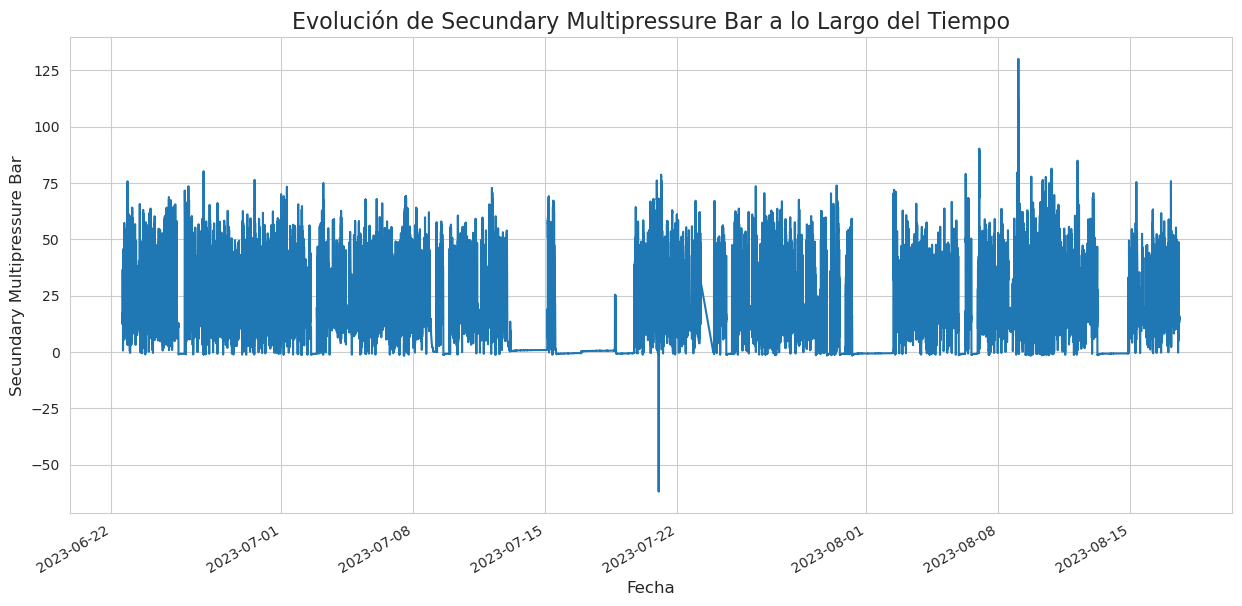

In [7]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7) # Aumentar el tamaño del gráfico

raw_dataset['secundary_multipressure_bar'].plot()

# Añadir títulos y etiquetas para mayor claridad
plt.title('Evolución de Secundary Multipressure Bar a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Secundary Multipressure Bar', fontsize=12)
plt.show()

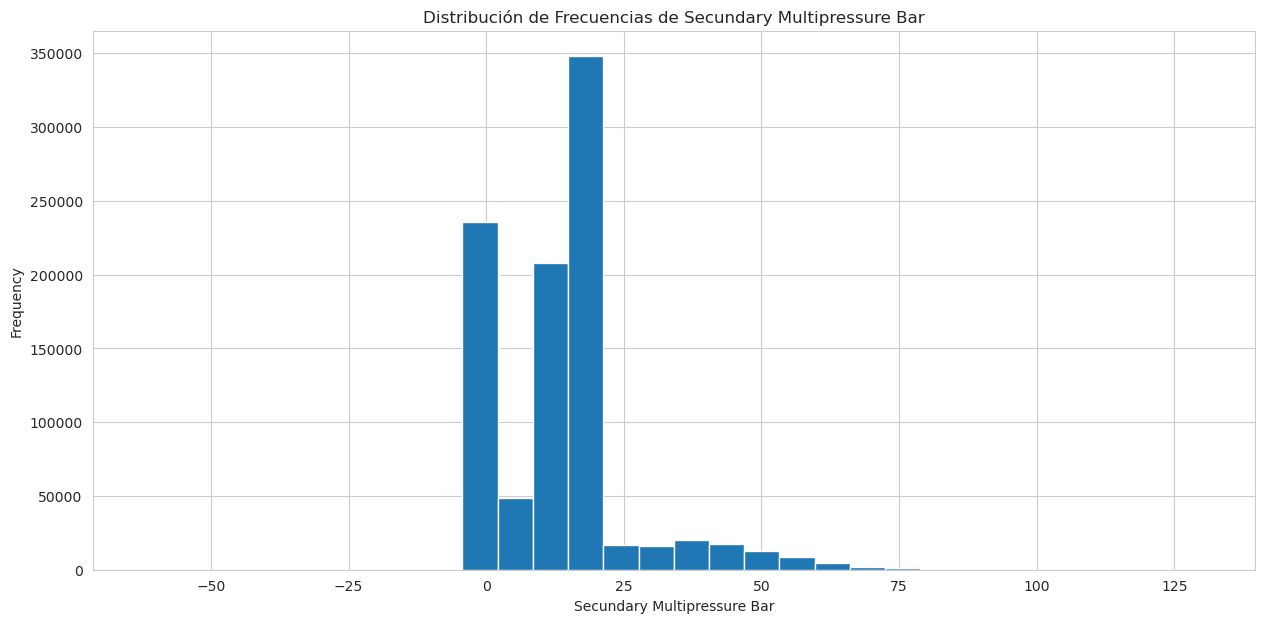

In [8]:
raw_dataset['secundary_multipressure_bar'].plot(kind='hist', bins=30, title='Distribución de Frecuencias de Secundary Multipressure Bar')
plt.xlabel('Secundary Multipressure Bar')
plt.show()

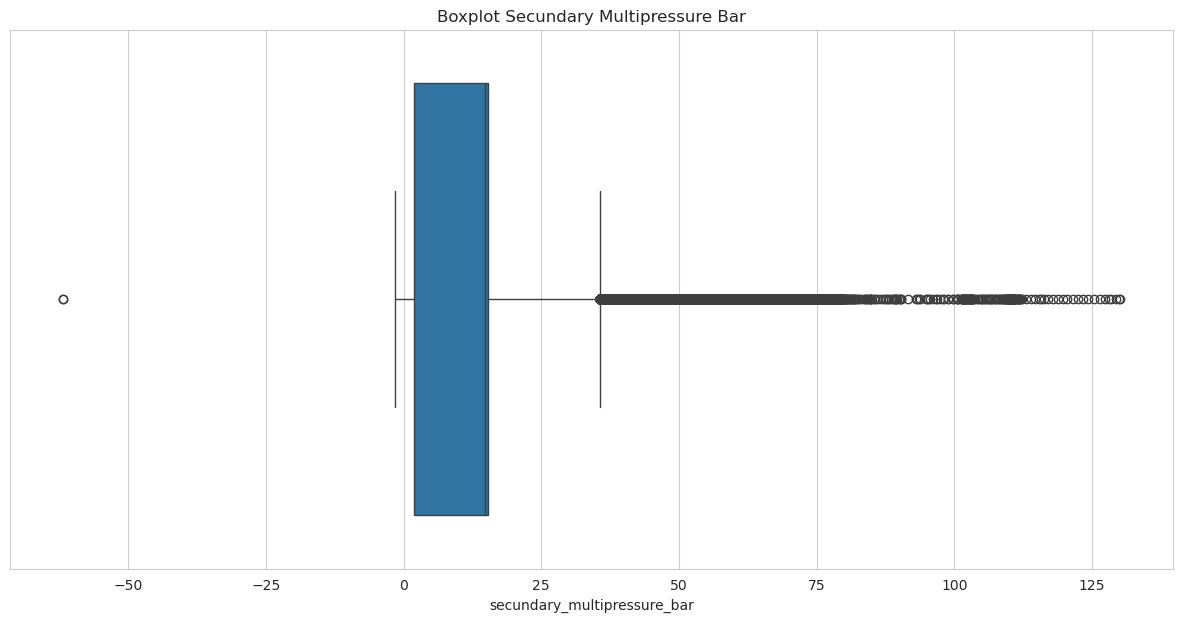

In [9]:
sns.boxplot(x=raw_dataset['secundary_multipressure_bar'])
plt.title('Boxplot Secundary Multipressure Bar')
plt.show()

# Preprocesamiento de Datos

## Eliminación de las columnas primary

Dada la naturaleza de nuestro proyecto, queremos predecir la variable secundary_multipressure_bar, por esta razón, todas las caracterísiticas que influyen en ella son las que tienen como pre fijos "secundary". Por esta razón, las columnas que son de primary, no son necesarias para nuestra predicción, por lo tanto procedemos a eliminarlas.

In [10]:
# Eliminar las columnas relacionadas con primary

# Primero se obtienen los nombres de las columnas que contienen 'primary'
primary_columns = raw_dataset.filter(like = 'primary').columns

# Eliminamos las columnas del DataFrame
processed_dataset = raw_dataset.drop(columns = primary_columns)

# Imprimir la cantidad de columnas eliminadas y las primeras filas del nuevo DataFrame
print("\nDataFrame después de eliminar las columnas:")
print(f"Se eliminaron {len(primary_columns)}")
processed_dataset.head()



DataFrame después de eliminar las columnas:
Se eliminaron 13


,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,,,
2023-06-22 14:16:06.761126,t,3.5,21.589945,33.216620,94.21156,57.346170,34.467407,99.9,103.2,99.8,94.9,100.1,102.2,95.8,110.7,14.624008
2023-06-22 14:16:12.104136,t,3.5,21.516739,33.197170,94.46119,57.368862,34.337220,99.9,103.2,99.8,94.9,100.3,102.2,95.8,110.6,14.967206
2023-06-22 14:16:17.457427,t,3.5,21.919836,33.122610,94.12079,57.312130,34.402344,99.9,103.1,99.8,94.8,100.2,102.2,95.8,110.4,15.272269
2023-06-22 14:16:25.906595,t,3.5,21.708180,33.070736,94.32503,57.266743,34.272156,99.9,103.1,99.8,94.7,99.6,102.2,95.8,110.2,14.776541
2023-06-22 14:16:33.827435,t,3.5,21.853577,33.161510,94.35907,57.391556,34.239563,99.9,103.1,99.8,94.6,99.8,102.2,95.8,109.9,15.234137


## Verificación de la columna de tiempo este en el formato y tipo correcto

In [11]:
# Validar el tipo de la columna de tiempo sea el indice
print(processed_dataset.index)

DatetimeIndex(['2023-06-22 14:16:06.761126', '2023-06-22 14:16:12.104136',
               '2023-06-22 14:16:17.457427', '2023-06-22 14:16:25.906595',
               '2023-06-22 14:16:33.827435', '2023-06-22 14:16:38.907547',
               '2023-06-22 14:16:43.990893', '2023-06-22 14:16:49.089285',
               '2023-06-22 14:16:54.170175', '2023-06-22 14:16:59.267724',
               ...
               '2023-08-17 14:06:09.412751', '2023-08-17 14:06:14.516200',
               '2023-08-17 14:06:19.599293', '2023-08-17 14:06:24.668499',
               '2023-08-17 14:06:29.758595', '2023-08-17 14:06:34.836618',
               '2023-08-17 14:06:39.920084', '2023-08-17 14:06:45.001977',
               '2023-08-17 14:06:50.075040', '2023-08-17 14:06:55.144016'],
              dtype='datetime64[ns]', name='date_time', length=939781, freq=None)


In [12]:
#Validamos si la columna de tiempo está en el formato correcto
print(f"Tipo de dato: {processed_dataset.index.dtype}")


Tipo de dato: datetime64[ns]


## Verificación de valores nulos

Las series de tiempo no pueden procesar valores nulos, por lo cual validamos que no existan

In [13]:
# Valorizamos si existen valores nulos en el dataset
null_values = processed_dataset.isnull().sum()
print("\nValores nulos por columna:")
print(null_values)


Valores nulos por columna:
runautomode_bool               0
actual_speed_m_min             0
secundary_pumpspeed_rpm        0
secundary_pa16d1_bar           0
secundary_p014d1_bar           0
secundary_p015d1_bar           0
secundary_pa7b3_mm             0
secundary_pa4b2_c              0
secundary_pa4b5_c              0
secundary_pu2b2_c              0
secundary_p012b3_c             0
secundary_p022b3_c             0
secundary_pa16d6_c             0
secundary_p014d6_c             0
secundary_p015d6_c             0
secundary_multipressure_bar    0
dtype: int64


## Procesamiento de variable categórica.

Nuestro dataset presenta una variable categórica (runautomode_bool), la cual indica si la máquina esta funcionando o no, al ser un valor booleano, debemos procesarla como variable ordinal, ya que el valor true o 1 significa que la máquina esta funcionando y false o 0, que la máquina no esta funcionando, lo que hace que cuantitativamente 1 sea más que 0.

In [14]:
encoder = LabelEncoder()
processed_dataset['runautomode_bool'] = encoder.fit_transform(processed_dataset['runautomode_bool'])
processed_dataset.head()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,,,
2023-06-22 14:16:06.761126,1,3.5,21.589945,33.216620,94.21156,57.346170,34.467407,99.9,103.2,99.8,94.9,100.1,102.2,95.8,110.7,14.624008
2023-06-22 14:16:12.104136,1,3.5,21.516739,33.197170,94.46119,57.368862,34.337220,99.9,103.2,99.8,94.9,100.3,102.2,95.8,110.6,14.967206
2023-06-22 14:16:17.457427,1,3.5,21.919836,33.122610,94.12079,57.312130,34.402344,99.9,103.1,99.8,94.8,100.2,102.2,95.8,110.4,15.272269
2023-06-22 14:16:25.906595,1,3.5,21.708180,33.070736,94.32503,57.266743,34.272156,99.9,103.1,99.8,94.7,99.6,102.2,95.8,110.2,14.776541
2023-06-22 14:16:33.827435,1,3.5,21.853577,33.161510,94.35907,57.391556,34.239563,99.9,103.1,99.8,94.6,99.8,102.2,95.8,109.9,15.234137


## Filtrado e imputación de datos

Como se ve en la descripción de los datos en la tabla de abajo, existen valores de sensores que son negativos, sin embargo con el criterio del experto del área, no pueden existir presiones ni temperaturas negativas ya que es físicamente imposible, pueden ser errores en sensores, malas calibraciones, etc. Por lo tanto estos datos deben de tratarse.

In [15]:
processed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939781 entries, 2023-06-22 14:16:06.761126 to 2023-08-17 14:06:55.144016
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   runautomode_bool             939781 non-null  int64  
 1   actual_speed_m_min           939781 non-null  float64
 2   secundary_pumpspeed_rpm      939781 non-null  float64
 3   secundary_pa16d1_bar         939781 non-null  float64
 4   secundary_p014d1_bar         939781 non-null  float64
 5   secundary_p015d1_bar         939781 non-null  float64
 6   secundary_pa7b3_mm           939781 non-null  float64
 7   secundary_pa4b2_c            939781 non-null  float64
 8   secundary_pa4b5_c            939781 non-null  float64
 9   secundary_pu2b2_c            939781 non-null  float64
 10  secundary_p012b3_c           939781 non-null  float64
 11  secundary_p022b3_c           939781 non-null  float64
 12  secundary_

In [16]:
processed_dataset.describe()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,0.526330,3.173700,35.535232,25.243818,76.610402,47.184574,312.270014,86.604708,90.091598,86.239594,79.854949,82.333884,113.969462,79.217654,90.614959,13.407878
std,0.499307,3.198930,29.190585,13.188008,60.827016,43.669193,164.502212,35.158704,36.297575,38.500836,38.295258,31.235942,137.691665,25.599289,37.586891,12.227220
min,0.000000,0.000000,0.000000,-24.998379,-87.494320,-87.494320,-11.489197,21.900000,-199.700000,21.900000,-200.000000,22.200000,-163.900000,22.200000,-193.100000,-61.889874
25%,0.000000,0.000000,0.110744,27.228813,13.979121,-0.260974,168.529110,93.900000,101.900000,91.200000,82.900000,83.700000,101.100000,83.600000,92.800000,1.849451
50%,1.000000,3.000000,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,99.800000,102.000000,91.000000,107.400000,14.833740
75%,1.000000,6.500000,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,100.200000,102.900000,94.200000,112.000000,15.367602
max,1.000000,7.899999,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,200.900000,869.900000,869.900000,869.900000,130.033550


Como estas filas perteneces a una secuencia de datos, eliminarlas podría significar una perdida de información o podría entrenarse el modelo con eventos con gaps incoherentes, deformar los lags (ya que no sería espacios iguales)

In [17]:
processed_dataset.count()

runautomode_bool               939781
actual_speed_m_min             939781
secundary_pumpspeed_rpm        939781
secundary_pa16d1_bar           939781
secundary_p014d1_bar           939781
secundary_p015d1_bar           939781
secundary_pa7b3_mm             939781
secundary_pa4b2_c              939781
secundary_pa4b5_c              939781
secundary_pu2b2_c              939781
secundary_p012b3_c             939781
secundary_p022b3_c             939781
secundary_pa16d6_c             939781
secundary_p014d6_c             939781
secundary_p015d6_c             939781
secundary_multipressure_bar    939781
dtype: int64

In [18]:
cols = ["secundary_p014d1_bar", "secundary_pa16d1_bar",
        "secundary_multipressure_bar", "secundary_pa7b3_mm",
       "secundary_p015d1_bar","secundary_pa4b5_c",
       "secundary_p012b3_c","secundary_pa16d6_c",
       "secundary_p015d6_c"]

(processed_dataset["secundary_p014d1_bar"] < 0).sum()

for col in cols:
    neg_values = (processed_dataset[col] < 0).sum()
    print(f"En la columna {col}: {neg_values} imputan")
    porcentage = neg_values/processed_dataset[col].count()*100
    print(f"El porcetaje de datos perdido es de: {porcentage}")
    print("\n")

En la columna secundary_p014d1_bar: 7577 imputan
El porcetaje de datos perdido es de: 0.8062516692718836


En la columna secundary_pa16d1_bar: 367 imputan
El porcetaje de datos perdido es de: 0.039051651395378285


En la columna secundary_multipressure_bar: 157779 imputan
El porcetaje de datos perdido es de: 16.788911459159102


En la columna secundary_pa7b3_mm: 45 imputan
El porcetaje de datos perdido es de: 0.0047883496261363016


En la columna secundary_p015d1_bar: 259334 imputan
El porcetaje de datos perdido es de: 27.59515248765404


En la columna secundary_pa4b5_c: 2 imputan
El porcetaje de datos perdido es de: 0.0002128155389393912


En la columna secundary_p012b3_c: 5 imputan
El porcetaje de datos perdido es de: 0.0005320388473484779


En la columna secundary_pa16d6_c: 2 imputan
El porcetaje de datos perdido es de: 0.0002128155389393912


En la columna secundary_p015d6_c: 8 imputan
El porcetaje de datos perdido es de: 0.0008512621557575648




Todas las columnas, exceptuando las columns secundary_multipressure_bar y columna secundary_p015d1_bar, representan un bajo porcentaje de los datos por lo que se realizará la imputación sin mayor análisis:

In [20]:
cols = ["secundary_p014d1_bar", "secundary_pa16d1_bar",
       "secundary_pa7b3_mm",
       "secundary_pa4b5_c",
       "secundary_p012b3_c","secundary_pa16d6_c",
       "secundary_p015d6_c"]

for col in cols:
    processed_dataset[col] = processed_dataset[col].mask(processed_dataset[col] < 0, np.nan)
    processed_dataset[col] = processed_dataset[col].interpolate(method="time")

processed_dataset.describe()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,0.526330,3.173700,35.535232,25.255371,77.332990,47.184574,312.270427,86.604708,90.092883,86.239594,79.858270,82.333884,113.970634,79.217654,90.619504,13.407878
std,0.499307,3.198930,29.190585,13.156916,59.389241,43.669193,164.501426,35.158704,36.300587,38.500836,38.310944,31.235942,137.692292,25.599289,37.600161,12.227220
min,0.000000,0.000000,0.000000,0.969332,0.805615,-87.494320,0.032532,21.900000,22.100000,21.900000,21.600000,22.200000,22.300000,22.200000,1.100000,-61.889874
25%,0.000000,0.000000,0.110744,27.228813,14.001815,-0.260974,168.529110,93.900000,101.900000,91.200000,82.900000,83.700000,101.100000,83.600000,92.800000,1.849451
50%,1.000000,3.000000,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,99.800000,102.000000,91.000000,107.400000,14.833740
75%,1.000000,6.500000,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,100.200000,102.900000,94.200000,112.000000,15.367602
max,1.000000,7.899999,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,200.900000,869.900000,869.900000,869.900000,130.033550


Sin embargo as columns secundary_multipressure_bar y columna secundary_p015d1_bar sí se van a ver a detalles los valores negativos

<Axes: xlabel='date_time'>

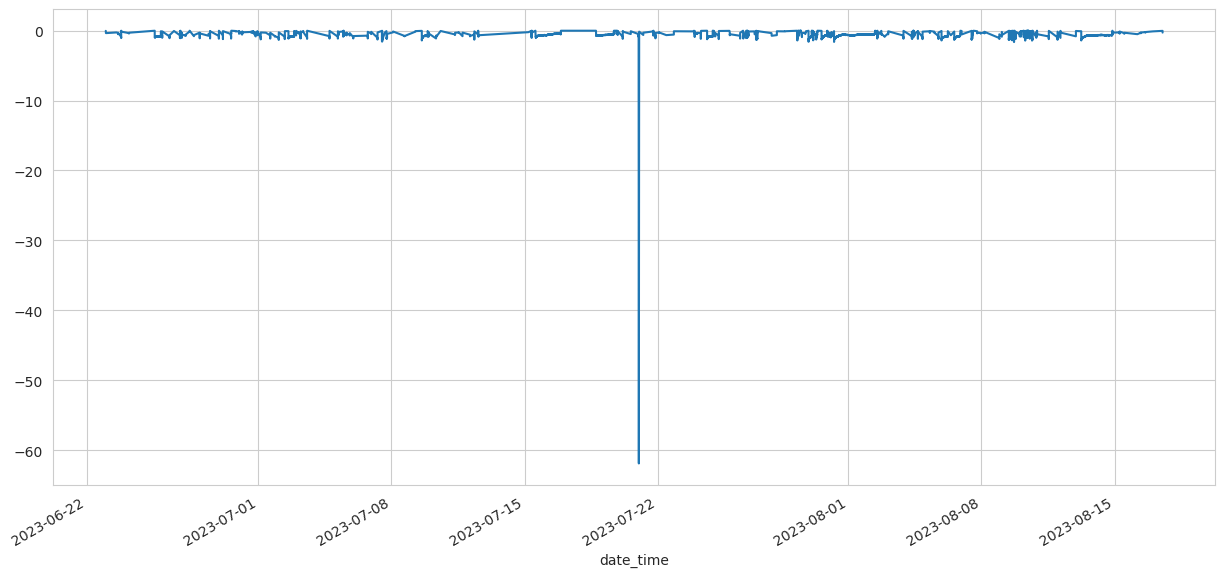

In [21]:
processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].plot()

La gráfica evidencia como los valores menores a 0 con varios pero la mayoría están muy cerca de cero, se sospecha que el problema es calibraciones del equipo.

In [22]:
processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].describe()

count    157779.000000
mean         -0.717227
std           0.292793
min         -61.889874
25%          -0.819860
50%          -0.667328
75%          -0.610128
max          -0.019067
Name: secundary_multipressure_bar, dtype: float64

In [23]:
IQR = processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.75) - processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.25)

LL = processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.25) -1.5*IQR
LL

-1.1344571

Se toma la decisión de iterpolar solo los datos que se salen del límite de outliers en los datos menores a cero.

In [24]:
processed_dataset.secundary_multipressure_bar = processed_dataset.secundary_multipressure_bar.mask(processed_dataset.secundary_multipressure_bar < LL, np.nan)
processed_dataset.secundary_multipressure_bar = processed_dataset.secundary_multipressure_bar.interpolate(method="time")

<Axes: xlabel='date_time'>

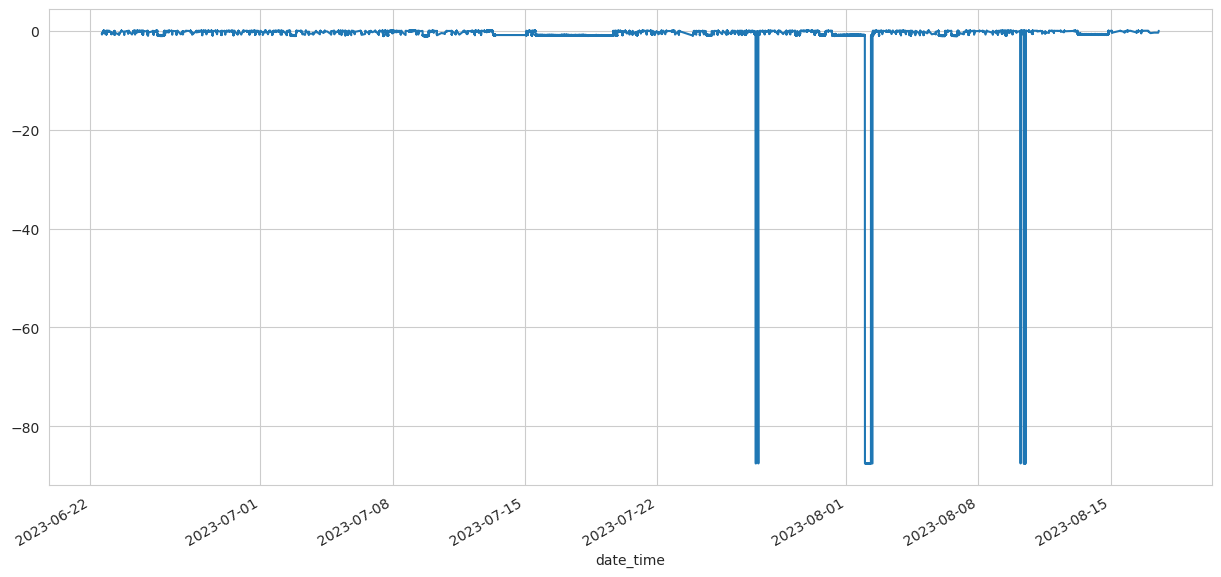

In [25]:
processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].plot()

La gráfica evidencia como los valores menores a 0 con varios pero la mayoría están muy cerca de cero, se sospecha que el problema es calibraciones del equipo.

In [26]:
processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].describe()

count    259334.000000
mean         -3.067981
std          13.843635
min         -87.494320
25%          -0.941775
50%          -0.885042
75%          -0.760228
max          -0.011347
Name: secundary_p015d1_bar, dtype: float64

In [27]:
IQR = processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.75) - processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.25)

LL = processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.25) -1.5*IQR
LL

-1.2140957

Se toma la decisión de iterpolar solo los datos que se salen del límite de outliers en los datos menores a cero.

In [28]:
processed_dataset.secundary_p015d1_bar = processed_dataset.secundary_p015d1_bar.mask(processed_dataset.secundary_p015d1_bar < LL, np.nan)
processed_dataset.secundary_p015d1_bar = processed_dataset.secundary_p015d1_bar.interpolate(method="time")

#### Descripción Final de los datos

In [29]:
processed_dataset.describe()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,0.526330,3.173700,35.535232,25.255371,77.332990,47.840092,312.270427,86.604708,90.092883,86.239594,79.858270,82.333884,113.970634,79.217654,90.619504,13.409585
std,0.499307,3.198930,29.190585,13.156916,59.389241,42.303429,164.501426,35.158704,36.300587,38.500836,38.310944,31.235942,137.692292,25.599289,37.600161,12.225385
min,0.000000,0.000000,0.000000,0.969332,0.805615,-1.191402,0.032532,21.900000,22.100000,21.900000,21.600000,22.200000,22.300000,22.200000,1.100000,-1.124924
25%,0.000000,0.000000,0.110744,27.228813,14.001815,-0.124814,168.529110,93.900000,101.900000,91.200000,82.900000,83.700000,101.100000,83.600000,92.800000,1.868517
50%,1.000000,3.000000,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,99.800000,102.000000,91.000000,107.400000,14.833740
75%,1.000000,6.500000,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,100.200000,102.900000,94.200000,112.000000,15.367602
max,1.000000,7.899999,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,200.900000,869.900000,869.900000,869.900000,130.033550


## Selección de Features

### Mutual Information

In [30]:
#X = processed_dataset.drop(columns=["secundary_multipressure_bar"])
#y = processed_dataset["secundary_multipressure_bar"]

mi = mutual_info_regression(processed_dataset.drop(columns=["secundary_multipressure_bar"]),
                            processed_dataset["secundary_multipressure_bar"])
mi_series = pd.Series(mi, index=processed_dataset.drop(columns=["secundary_multipressure_bar"]).columns).sort_values(ascending=False)
print(mi_series)

secundary_p014d1_bar       1.253828
secundary_pa7b3_mm         1.223636
secundary_pa16d1_bar       1.124409
secundary_p015d1_bar       1.075731
secundary_pa4b2_c          1.040613
secundary_p014d6_c         1.034173
secundary_pa16d6_c         1.018335
secundary_pa4b5_c          1.018032
secundary_pu2b2_c          1.010822
secundary_p012b3_c         0.993386
secundary_p015d6_c         0.978761
secundary_p022b3_c         0.896199
secundary_pumpspeed_rpm    0.740110
actual_speed_m_min         0.526061
runautomode_bool           0.444078
dtype: float64


### Correlación Pearson

In [31]:
# Convertir columna booleana (si viene como 't'/'f')
if processed_dataset.drop(columns=["secundary_multipressure_bar"])["runautomode_bool"].dtype == object:
    processed_dataset.drop(columns=["secundary_multipressure_bar"])["runautomode_bool"] = processed_dataset.drop(columns=["secundary_multipressure_bar"])["runautomode_bool"].map({"t": 1, "f": 0})

# Calcular correlación de Pearson de cada feature respecto al target
pearson_corr = processed_dataset.drop(columns=["secundary_multipressure_bar"]).corrwith(processed_dataset["secundary_multipressure_bar"])

# Mostrar ordenado de mayor a menor correlación
print(pearson_corr.sort_values(ascending=False))

secundary_p022b3_c         0.609847
secundary_p014d6_c         0.581920
secundary_pa16d1_bar       0.581056
secundary_p015d6_c         0.536859
secundary_pa4b5_c          0.421530
secundary_pa4b2_c          0.416004
secundary_p012b3_c         0.411231
secundary_pu2b2_c          0.387356
secundary_p014d1_bar       0.330820
secundary_p015d1_bar       0.289963
runautomode_bool           0.173971
actual_speed_m_min         0.138297
secundary_pa16d6_c        -0.101013
secundary_pa7b3_mm        -0.207862
secundary_pumpspeed_rpm   -0.239091
dtype: float64


- Si MI es alta y Pearson es baja → relación fuertemente no lineal

- Si ambas son altas → relación lineal + no lineal

- Si Pearson es alta y MI es baja → relación lineal simple (casi no pasa en tu dataset)

| Feature                 | MI        | Pearson     | Interpretación del tipo de relación         |
|-------------------------|-----------|-------------|----------------------------------------------|
| secundary_p014d1_bar    | 1.257104  | 0.336581    | Alta importancia no lineal                  |
| secundary_pa7b3_mm      | 1.224553  | -0.207830   | Fuerte relación no lineal, invertida        |
| secundary_pa16d1_bar    | 1.129050  | 0.580413    | Relación mixta: lineal + no lineal          |
| secundary_p015d1_bar    | 1.088624  | 0.297783    | No lineal moderada                           |
| secundary_pa4b2_c       | 1.038111  | 0.415851    | Relación mixta                               |
| secundary_p014d6_c      | 1.030959  | 0.581808    | Lineal moderada + componente no lineal       |
| secundary_pa16d6_c      | 1.017278  | -0.100991   | No lineal débil, posible cambio de pendiente |
| secundary_pa4b5_c       | 1.016413  | 0.421461    | Mixta                                        |
| secundary_pu2b2_c       | 1.006020  | 0.387175    | Mixta                                        |
| secundary_p012b3_c      | 0.995920  | 0.411354    | Mixta                                        |
| secundary_p015d6_c      | 0.979866  | 0.537060    | Principalmente lineal                        |
| secundary_p022b3_c      | 0.896165  | 0.609788    | Fuerte componente lineal                     |
| secundary_pumpspeed_rpm | 0.741241  | -0.238969   | No lineal, efecto inverso                    |
| actual_speed_m_min      | 0.526204  | 0.138413    | Débil lineal + algo de no linealidad         |
| runautomode_bool        | 0.445946  | 0.174090    | Baja información lineal y no lineal          |


Tomando esta información se toma la decisión de descartar las variables "runautomode_bool" y "actual_speed_m_min". Estas variables aportan muy poca información sobre el target, tanto lineal como no lineal.

In [32]:
processed_dataset.drop(columns=['actual_speed_m_min','runautomode_bool'], inplace=True)
processed_dataset

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,
2023-06-22 14:16:06.761126,21.589945,33.216620,94.211560,57.346170,34.467407,99.9,103.2,99.8,94.9,100.1,102.2,95.8,110.7,14.624008
2023-06-22 14:16:12.104136,21.516739,33.197170,94.461190,57.368862,34.337220,99.9,103.2,99.8,94.9,100.3,102.2,95.8,110.6,14.967206
2023-06-22 14:16:17.457427,21.919836,33.122610,94.120790,57.312130,34.402344,99.9,103.1,99.8,94.8,100.2,102.2,95.8,110.4,15.272269
2023-06-22 14:16:25.906595,21.708180,33.070736,94.325030,57.266743,34.272156,99.9,103.1,99.8,94.7,99.6,102.2,95.8,110.2,14.776541
2023-06-22 14:16:33.827435,21.853577,33.161510,94.359070,57.391556,34.239563,99.9,103.1,99.8,94.6,99.8,102.2,95.8,109.9,15.234137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-17 14:06:34.836618,26.234114,36.341827,109.972115,76.862470,307.765840,100.2,104.8,99.9,94.1,99.9,102.8,93.2,110.2,15.234137
2023-08-17 14:06:39.920084,26.210611,36.341827,109.563640,76.680920,307.733280,100.2,104.8,99.9,94.1,99.6,102.8,93.2,110.3,15.005339
2023-08-17 14:06:45.001977,26.186130,36.338585,109.472860,76.590160,307.700740,100.3,104.9,99.9,94.1,99.7,102.8,93.2,110.4,14.776541


## Lag Features
Vamos a generar un lag de 5. Vamos a usar lag features para darle al modelo una memoria del pasado. Básicamente, creamos nuevas columnas que contienen los valores de la variable de momentos anteriores. Esto es muy importante porque el modelo no entiende el tiempo por sí solo. Al darle estas pistas del pasado, le ayudamos a reconocer patrones y a usar la información anterior para predecir lo que va a suceder.

In [33]:
#processed_dataset = processed_dataset.copy()

target_col = "secundary_multipressure_bar"

# Grupos de features según MI
group_A = [
    "secundary_p014d1_bar",
    "secundary_pa7b3_mm",
    "secundary_pa16d1_bar",
    "secundary_p015d1_bar",
    "secundary_pa4b2_c",
    "secundary_p014d6_c"
]

group_B = [
    "secundary_pa16d6_c",
    "secundary_pa4b5_c",
    "secundary_p012b3_c",
    "secundary_pu2b2_c",
    "secundary_p015d6_c",
    "secundary_p022b3_c"
]

group_C = [
    "secundary_pumpspeed_rpm"
]

# Número de lags por grupo
lags_A = 36
lags_B = 12
lags_C = 4

# Función para generar lags de una lista de columnas
def create_lags(df, cols, n_lags):
    for col in cols:
        for lag in range(1, n_lags + 1):
            df[f"{col}_lag_{lag}"] = df[col].shift(lag)

# Crear lags por grupo directamente en processed_dataset
create_lags(processed_dataset, group_A, lags_A)
create_lags(processed_dataset, group_B, lags_B)
create_lags(processed_dataset, group_C, lags_C)

# Crear el target futuro (+12 pasos = ~1 minuto hacia adelante)
processed_dataset["target_plus_12"] = processed_dataset[target_col].shift(-12)

# Eliminar filas con NaN (primeros 36 y últimos 12)
#processed_dataset = processed_dataset.dropna()


processed_dataset.shape, processed_dataset.head()


((939781, 307),
                             secundary_pumpspeed_rpm  secundary_pa16d1_bar  \
 date_time                                                                   
 2023-06-22 14:16:06.761126                21.589945             33.216620   
 2023-06-22 14:16:12.104136                21.516739             33.197170   
 2023-06-22 14:16:17.457427                21.919836             33.122610   
 2023-06-22 14:16:25.906595                21.708180             33.070736   
 2023-06-22 14:16:33.827435                21.853577             33.161510   
 
                             secundary_p014d1_bar  secundary_p015d1_bar  \
 date_time                                                                
 2023-06-22 14:16:06.761126              94.21156             57.346170   
 2023-06-22 14:16:12.104136              94.46119             57.368862   
 2023-06-22 14:16:17.457427              94.12079             57.312130   
 2023-06-22 14:16:25.906595              94.32503            

Los lags usan shift positivo porque miran al pasado, mientras que el target futuro usa shift negativo porque trae el futuro al presente para entrenar el modelo.

In [34]:
print(f"Features generadas después de lags por grupo: {processed_dataset.shape[1]}")

Features generadas después de lags por grupo: 307


## Rolling Means

In [35]:
window_size = 5

processed_dataset['target_MEAN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).mean()
processed_dataset['target_STD'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).std()
processed_dataset['target_MIN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).min()
processed_dataset['target_MAX'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).max()
processed_dataset = processed_dataset.dropna()

print(f"Features finales: {processed_dataset.shape[1]}")
processed_dataset.head(10)

Features finales: 311


,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,secundary_p022b3_c_lag_12,secundary_pumpspeed_rpm_lag_1,secundary_pumpspeed_rpm_lag_2,secundary_pumpspeed_rpm_lag_3,secundary_pumpspeed_rpm_lag_4,target_plus_12,target_MEAN,target_STD,target_MIN,target_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:19:18.792007,41.999100,31.806393,127.400630,85.066130,30.398987,99.9,103.3,99.9,93.7,100.2,...,100.3,39.588340,39.090630,37.106075,34.289630,15.653600,14.624008,0.520414,14.090146,15.482001
2023-06-22 14:19:23.870469,41.204315,31.783699,127.888535,85.735590,30.301392,100.0,103.3,100.0,93.7,99.9,...,100.1,41.999100,39.588340,39.090630,37.106075,14.986272,14.540116,0.355067,14.090146,15.062538
2023-06-22 14:19:28.946102,40.889020,31.816118,126.595020,84.805160,29.943360,100.0,103.3,100.0,93.8,99.8,...,99.8,41.204315,41.999100,39.588340,39.090630,14.890940,14.799420,0.413000,14.414277,15.386669
2023-06-22 14:19:34.030097,39.407448,31.761005,125.653240,84.351290,29.748047,100.0,103.3,100.0,93.8,99.9,...,99.9,40.889020,41.204315,41.999100,39.588340,15.329469,15.127364,0.626532,14.490543,16.053997
2023-06-22 14:19:39.106186,39.635914,31.842052,126.719826,84.975360,29.617859,100.0,103.3,99.9,93.9,100.2,...,100.2,39.407448,40.889020,41.204315,41.999100,15.443869,15.386669,0.644042,14.490543,16.053997
2023-06-22 14:19:44.204022,40.857390,31.657265,125.619200,84.578224,29.259888,100.0,103.3,100.0,93.9,100.3,...,100.4,39.635914,39.407448,40.889020,41.204315,15.348536,15.783252,0.559205,15.062538,16.473460
2023-06-22 14:19:49.282549,40.219524,31.806393,124.847626,83.636444,28.999512,99.9,103.2,100.0,94.0,100.1,...,100.3,40.857390,39.635914,39.407448,40.889020,15.005339,16.034930,0.419463,15.386669,16.473460
2023-06-22 14:19:54.359747,38.970695,31.757763,125.380920,84.135704,28.999512,99.9,103.2,99.9,94.1,99.8,...,100.1,40.219524,40.857390,39.635914,39.407448,14.776541,16.000610,0.487298,15.215070,16.473460
2023-06-22 14:19:59.443927,40.444260,31.702650,125.358220,84.010890,28.901855,99.9,103.3,99.9,94.2,99.7,...,99.8,38.970695,40.219524,40.857390,39.635914,15.272269,15.973917,0.487298,15.215070,16.473460


# Modelado de los datos

## Disminunción del dataset por restricciones computacionales

In [36]:
lite_size = int(len(processed_dataset) * 0.1)
lite_size
offset = lite_size - 5000
offset

88973

<Axes: xlabel='date_time'>

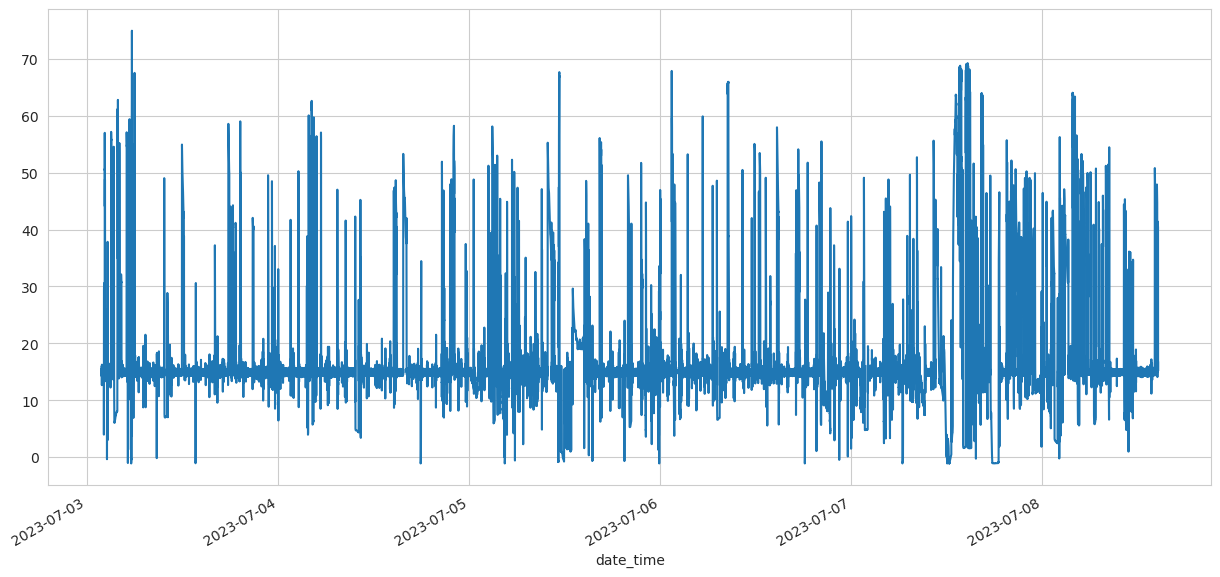

In [37]:
processed_dataset.iloc[offset*2:offset*2+lite_size].secundary_multipressure_bar.plot()

In [38]:
## Para pruenas, reducir el tamaÑo del dataset
processed_dataset = processed_dataset.iloc[offset*2:offset*2+lite_size]

raw_dataset.head()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,...,primary_p015d1_bar,primary_pa7b3_mm,primary_pa4b2_c,primary_pa4b5_c,primary_pu2b2_c,primary_p012b3_c,primary_p022b3_c,primary_pa16d6_c,primary_p014d6_c,primary_p015d6_c
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:16:06.761126,t,3.5,21.589945,33.216620,94.21156,57.346170,34.467407,99.9,103.2,99.8,...,78.950264,225.65234,102.0,99.7,100.4,86.9,100.2,869.9,100.2,105.3
2023-06-22 14:16:12.104136,t,3.5,21.516739,33.197170,94.46119,57.368862,34.337220,99.9,103.2,99.8,...,75.478180,226.00946,101.9,99.7,100.4,86.8,100.1,869.9,100.1,105.1
2023-06-22 14:16:17.457427,t,3.5,21.919836,33.122610,94.12079,57.312130,34.402344,99.9,103.1,99.8,...,81.038055,225.94452,101.8,99.7,100.4,86.4,100.2,869.9,100.0,105.1
2023-06-22 14:16:25.906595,t,3.5,21.708180,33.070736,94.32503,57.266743,34.272156,99.9,103.1,99.8,...,79.222590,225.84710,101.7,99.9,100.2,86.9,100.2,869.9,99.9,104.8
2023-06-22 14:16:33.827435,t,3.5,21.853577,33.161510,94.35907,57.391556,34.239563,99.9,103.1,99.8,...,75.841270,225.42505,101.6,99.9,100.2,86.9,100.2,869.9,99.8,104.6


## Creación de los conjuntos X & Y

In [39]:
#Conjunto Y
Y = processed_dataset["target_plus_12"]

#Conjunto X
X = processed_dataset.drop(columns=["target_plus_12"])

print("Dimensiones de los conjuntos:")
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

Dimensiones de los conjuntos:
X: (93973, 310)
Y: (93973,)


In [40]:
print("\n--- Variable Objetivo 'Y' (primeras 5 filas) ---")
Y.head()


--- Variable Objetivo 'Y' (primeras 5 filas) ---


date_time
2023-07-03 01:48:10.642684    15.234137
2023-07-03 01:48:15.742421    15.024406
2023-07-03 01:48:20.823059    14.700274
2023-07-03 01:48:25.906632    15.215070
2023-07-03 01:48:30.991364    15.176937
Name: target_plus_12, dtype: float64

In [41]:
print("\n--- Matriz de Características 'X' (primeras 5 filas) ---")
X.head()


--- Matriz de Características 'X' (primeras 5 filas) ---


,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,secundary_p022b3_c_lag_11,secundary_p022b3_c_lag_12,secundary_pumpspeed_rpm_lag_1,secundary_pumpspeed_rpm_lag_2,secundary_pumpspeed_rpm_lag_3,secundary_pumpspeed_rpm_lag_4,target_MEAN,target_STD,target_MIN,target_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-07-03 01:48:10.642684,52.078700,29.410620,146.02055,93.99597,272.19180,100.2,103.9,99.9,95.4,99.8,...,100.3,99.8,51.916500,52.153725,51.289690,52.287395,14.990086,0.450268,14.452410,15.348536
2023-07-03 01:48:15.742421,51.759150,29.287426,145.92978,94.22291,272.15924,100.1,104.0,99.9,95.3,100.3,...,100.6,100.3,52.078700,51.916500,52.153725,51.289690,15.054912,0.389956,14.452410,15.348536
2023-07-03 01:48:20.823059,52.035720,29.329570,146.48576,94.43850,272.02905,100.1,103.9,99.9,95.2,100.4,...,100.4,100.6,51.759150,52.078700,51.916500,52.153725,15.123551,0.268763,14.795607,15.348536
2023-07-03 01:48:25.906632,52.177277,29.452765,146.65596,94.43850,271.76868,100.1,103.9,99.9,95.1,100.3,...,100.2,100.4,52.035720,51.759150,52.078700,51.916500,15.108298,0.254593,14.795607,15.348536
2023-07-03 01:48:30.991364,51.855515,29.472216,146.81482,94.39311,271.50830,100.1,103.8,100.0,94.9,99.9,...,100.0,100.2,52.177277,52.035720,51.759150,52.078700,15.066351,0.241701,14.795607,15.348536


## Prueba ACF
Utilizamos ACF para determinar si la serie tiene estacionalidad. El objetivo es analizar si presenta algun pico cada n pasos o si no presenta nada, determinamos que no tiene estacionalidad.

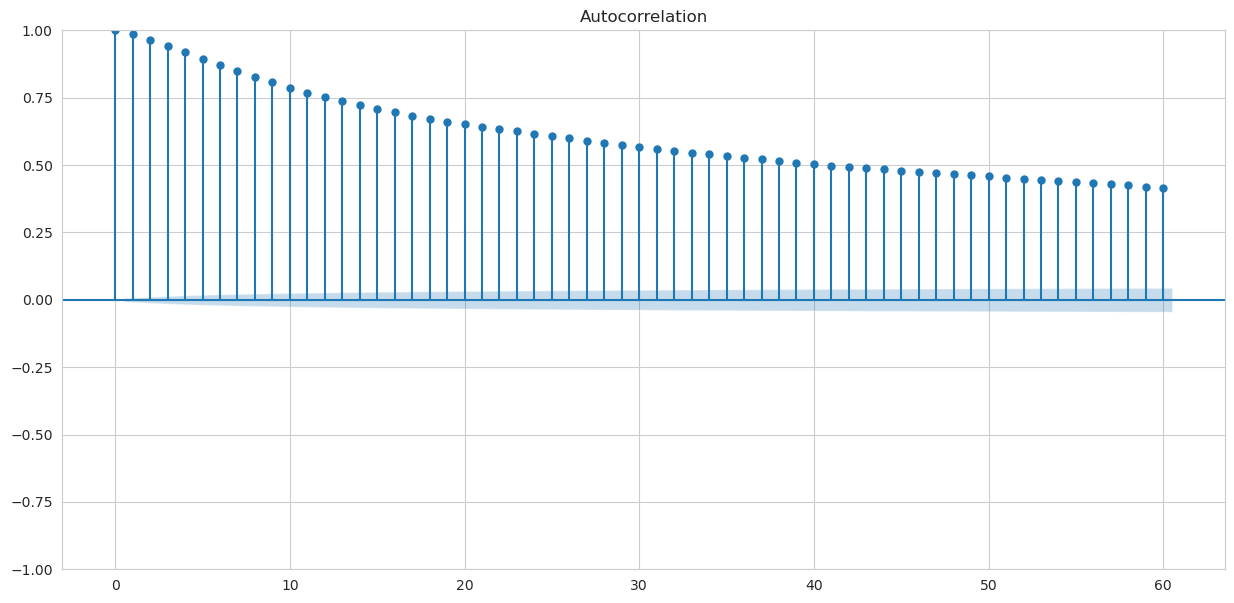

In [42]:
plot_acf(Y, lags = 60)
plt.show()

La gráfica anterior tiene una alta autocorrelación en lag 1, es decir la variable a predecir depende casi completamente del valor anterior, además se puede ver que, muy probablemente debido a la inercia física (común en presiones y temperaturas industriales) la señal cambia lentamente, es decir es una serie muy predecible usando sus propios valores pasados.

Además de acuerdo a la gráfica ACF, la señal no es estacionaria. Ya que de haber estacionalidad, se verían picos que suben y bajan cada cierto número de lags. Finalmente en la gráfica se ve como incluso en lags 60 todavía la autocorrelación es significativa.

## Prueba PACF

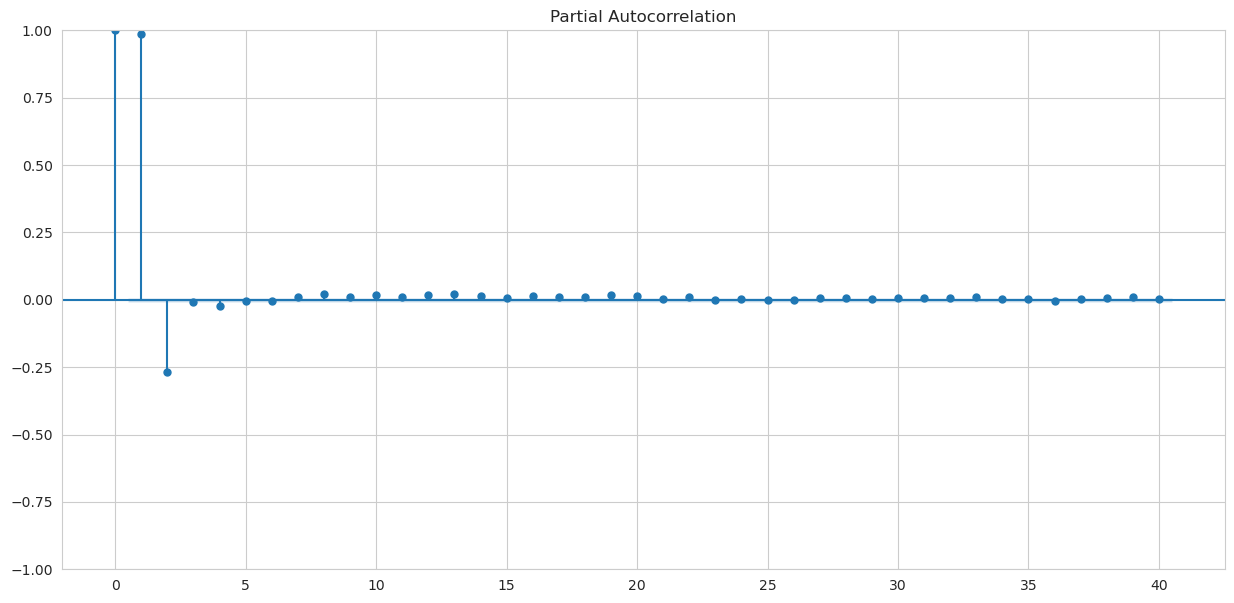

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(Y, lags=40)
plt.show()

Adicionalmente se grafica la gráfica PACF, para deternimar la correlación de la serie y su valor rezagado pero sin la incluencia de todos los lags intermedios.

En esta gráfica se ve como el Lag 1 es bastante alto, aproximadamente 0.98. Sin embargo para el Lag 2, es negativo y significativo, aproximadamente -0.25. Esto muestra un efecto rebote, es decir cuando la presión actual está subiendo, hace dos lags atrás estaba disminuyendo. Lo mismo al contrario, si la presión está bajando, tres pasos atrás estaba aumentado.

Esto es un patrón típico en controladores industriales, principalmente PIDs, existe una valor fijado y todo el sistema intenta mantener la variable en este valor fijado, por ejemplo la presión que se está prediciendo.

Después del lag 3, no hay relación directa, es decir que en la gráfica ACF, estos valores altos son heredados por la alta correlación de lag1 y lag2

## Prueba de ADF
Ejecutando la prueba ADF determinamos si la seria de tiempo es estacionaria o no

ADF Statistic: -19.605394
p-value: 0.000000
Estacionaria: True
1%: -3.430
5%: -2.862
10%: -2.567


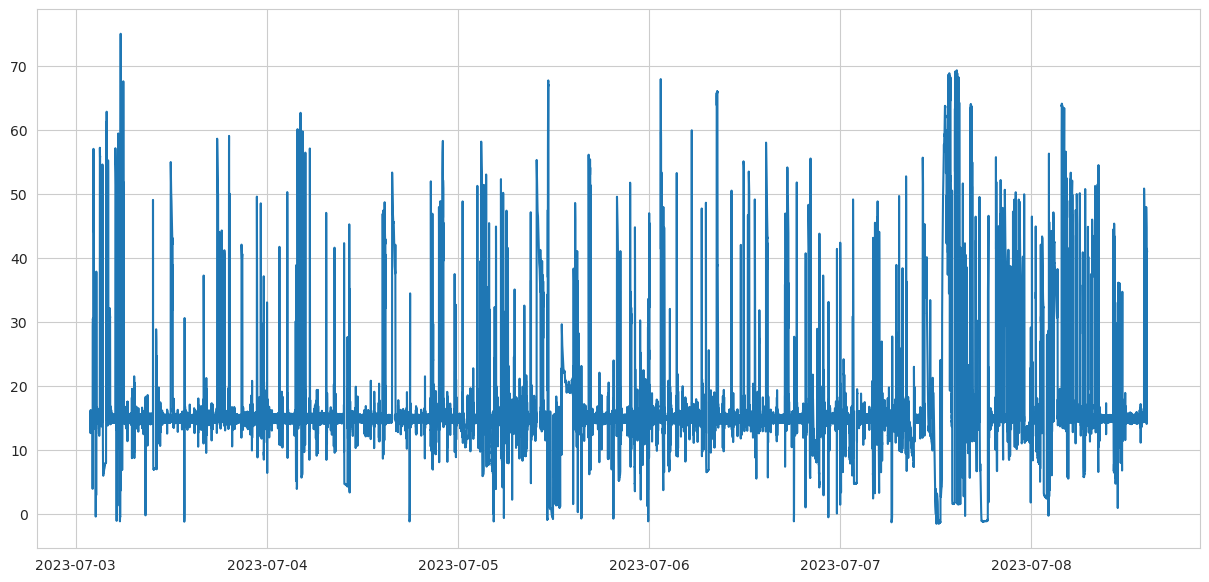

In [66]:
result = adfuller(Y.values)
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')
print(f'Estacionaria: {result[1] <= 0.05}')
for key, value in result[4].items():
    print(f'{key}: {value:.3f}')

plt.plot(Y)
plt.show()

Recordando la hipótesis del ADF:

H0 (nula): La serie NO es estacionaria (tiene raíz unitaria).
H1 (alternativa): La serie SÍ es estacionaria.

Para rechazar la hipótesis, es necesario un ADF Statistic muy negativo o un p-value < 0.05

Además de que el estadístico ADF es muy negativo -19.61, el valro de p-value es prácticamente 0.

Esto significa que la estacionaridad está presente en el modelo, que la señal es estable en su media y varianza y que no es necesario aplicar diferenciación.

## División del dataset en Train - Test
Vamos a dividir el dataset en 80% Train y 20% Test, en este escenario en particular el orden de los datos si importa, no vamos a utilizar ningún algoritmo que nos haga un shuffle de los datos.

Para esto vamos a utilizar el siguiente algoritmo:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [44]:
print("Tamaño del dataset original: ", len(processed_dataset))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = False,
                                                    random_state = 42)


print("\nTamaño del train: ", len(X_train))
print("\nTamaño del test: ", len(X_test))

Tamaño del dataset original:  93973

Tamaño del train:  75178

Tamaño del test:  18795


## Escalamiento de datos

In [45]:
# Escalado de características
transformer = RobustScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

## Comparación de Modelos

Vamos a entrenar múltiples modelos para encontrar el mejor desempeño:
- **SARIMAX**: Series temporales con variables exógenas
- **Random Forest**: Ensemble method no paramétrico
- **Gradient Boosting**: Ensemble potente para regresión
- **XGBoost**: Optimización extrema del gradient boosting

In [46]:
# Función mejorada de cálculo de MAPE
def calculate_mape(y_true, y_pred):
    """Calcula MAPE evitando divisiones por cero"""
    mask = y_true != 0
    if mask.sum() == 0:
        return np.inf
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100

# Función para crear un resumen de métricas
def create_metrics_summary(y_true, y_pred, model_name):
    """Crea un resumen de métricas para un modelo"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = calculate_mape(y_true.values if hasattr(y_true, 'values') else y_true, 
                          y_pred.values if hasattr(y_pred, 'values') else y_pred)
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE (%)': mape
    }

print("Funciones de evaluación definidas correctamente")

Funciones de evaluación definidas correctamente


In [50]:
# SARIMAX model with auto_arima
endog_train = Y_train
endog_test = Y_test
exog_train = X_train_scaled
exog_test = X_test_scaled
seasonal_period = 1

# Use auto_arima to find optimal order and seasonal_order
print("=" * 80)
print("1. MODELO SARIMAX CON AUTO_ARIMA")
print("=" * 80)
print("\nBuscando parámetros ARIMA óptimos...")
auto_model = auto_arima(
    endog_train,
    X=exog_train,
    seasonal=False,
    m=seasonal_period,
    max_p=5, max_q=5,
    #max_P=2, max_Q=2,
    d=None, D=None,
    max_d=2,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Get optimal order and seasonal_order
order = auto_model.order
seasonal_order = auto_model.seasonal_order

#print(f"Resumen de auto arima: "{auto_model.summary()})
print(f"Orden óptimo (p,d,q): {order}")
print(f"Orden estacional (P,D,Q,m): {seasonal_order}")

1. MODELO SARIMAX CON AUTO_ARIMA

Buscando parámetros ARIMA óptimos...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=295026.040, Time=2760.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=572350.826, Time=2154.99 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=2229.96 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=483229.588, Time=2596.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=292835.687, Time=2753.70 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=425712.631, Time=2721.87 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=293599.478, Time=2536.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=293736.560, Time=2885.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=390993.116, Time=2844.41 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=295228.297, Time=2554.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=292599.322, Time=2880.23 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=295227.055, Time=2897.89 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC

El modelo final es ARIMA(2,0,3) esto confirma lo que vimos en la prueba ADF, que al ser una serie estacionaria, no requiere grados de diferenciación, especialmente porque no se corige tendencia. 

Además el tiempo de entrenamiento es excesivo, ARIMA no escala bien para este dataset, especialmente porque este análisis se hizo con el 10% de los datos.


Métrica                Valor
------------------------------
RMSE                 25.4385
MAE                  19.3987
R²                   -1.9613
MAPE (%)            496.6386


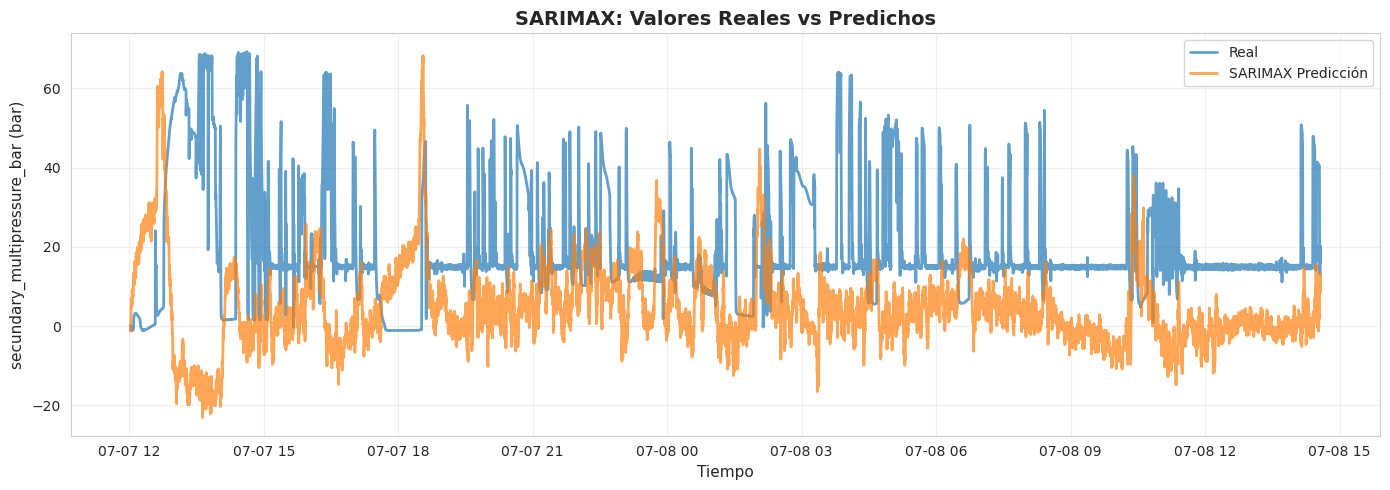

In [51]:
# Crear y ajustar el modelo SARIMAX con exógenas
model = SARIMAX(endog_train,
                exog=exog_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Realizar forecast sobre el conjunto de test
n_steps = len(endog_test)
forecast_res = model_fit.get_forecast(steps=n_steps, exog=exog_test)
y_pred_sarimax = forecast_res.predicted_mean

# Métricas SARIMAX
sarimax_metrics = create_metrics_summary(endog_test, y_pred_sarimax, "SARIMAX")

print(f"\n{'Métrica':<15} {'Valor':>12}")
print("-" * 30)
for key, value in sarimax_metrics.items():
    if key != 'Model':
        if isinstance(value, float):
            print(f"{key:<15} {value:>12.4f}")
            
# Visualización SARIMAX
plt.figure(figsize=(14, 5))
plt.plot(endog_test.index, endog_test.values, label='Real', linewidth=2, alpha=0.7)
plt.plot(endog_test.index, y_pred_sarimax.values, label='SARIMAX Predicción', linewidth=2, alpha=0.7)
plt.title('SARIMAX: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=11)
plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Las metricas no son buenas, el MAE es muy algo, el R2 es negativo y el MAPE es de 497%. El modelo SARIMAX no está capturando el comportamiento real de la serie, el modelo el peor que predecir la media, ya que el r2 es negativo.

Los modelos ARIMA/SARIMAX son modelo lineales y este proceso tiene relaciones no lineales, depende de múltiples sensores e involucra efecto físicos, que SARIMAX no puede modelar de manera satisfactoria.

Cómo se ve en la gráfica, la curva predicha no es buena para predecir, picos, vaígas, saltos abruptos e incluso predice valore negativos cuando es físicamente imposible.


2. MODELO RANDOM FOREST

Entrenando Random Forest...

Métrica                Valor
------------------------------
RMSE                 12.6273
MAE                   9.9009
R²                    0.2703
MAPE (%)            139.1547


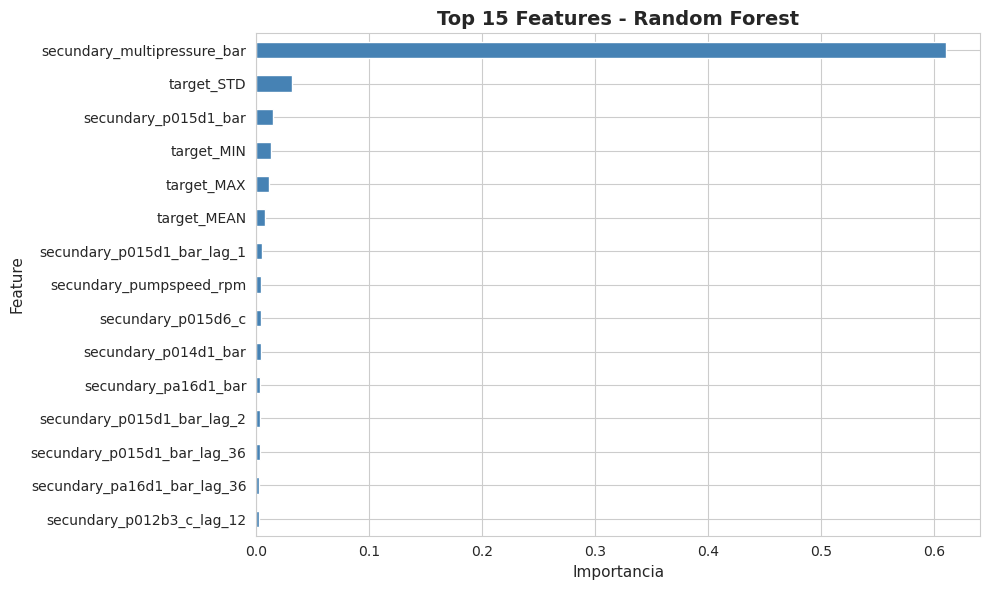

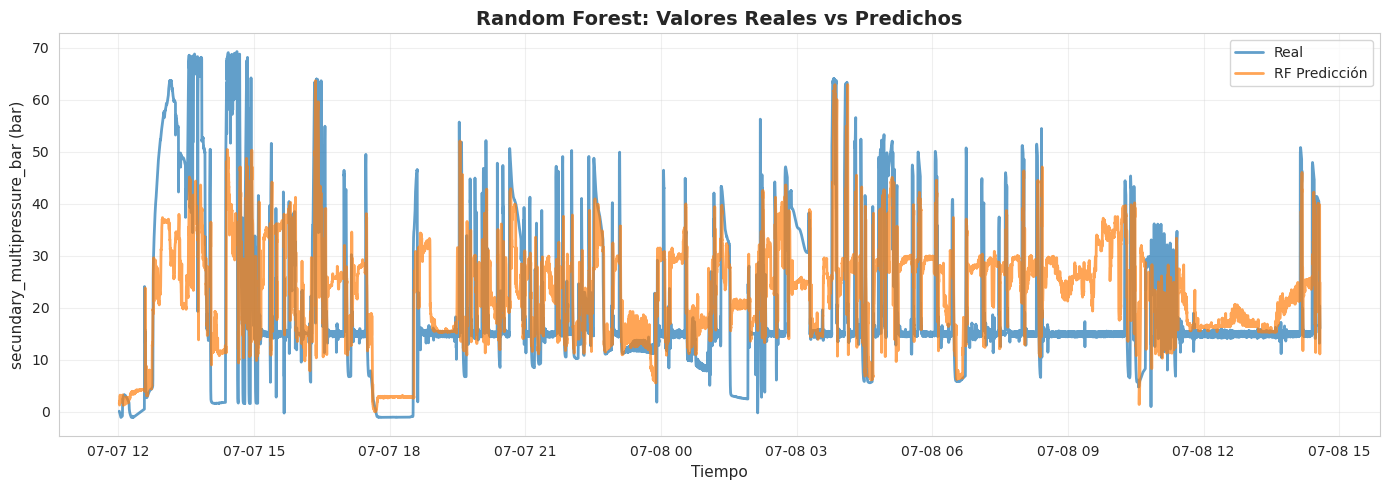

In [47]:

# 2. RANDOM FOREST REGRESSOR
print("\n" + "=" * 80)
print("2. MODELO RANDOM FOREST")
print("=" * 80)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

print("\nEntrenando Random Forest...")
rf_model.fit(X_train_scaled, Y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rf_metrics = create_metrics_summary(Y_test, y_pred_rf, "Random Forest")

print(f"\n{'Métrica':<15} {'Valor':>12}")
print("-" * 30)
for key, value in rf_metrics.items():
    if key != 'Model':
        if isinstance(value, float):
            print(f"{key:<15} {value:>12.4f}")

# Feature importance
feature_importance_rf = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='barh', color='steelblue')
plt.title('Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importancia', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualización
plt.figure(figsize=(14, 5))
plt.plot(Y_test.index, Y_test.values, label='Real', linewidth=2, alpha=0.7)
plt.plot(Y_test.index, y_pred_rf, label='RF Predicción', linewidth=2, alpha=0.7)
plt.title('Random Forest: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=11)
plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Las métricas del modelo Random Forest, mejoró considerablemente vs el modelo SARIMAX, el error cuadrático es de +-12 bar, en error absoluto MAE es de +-9.9. La métrica R2 es de 0.27, es decir el modelo explica el 27% de la varianza real, lo cual no es un valor bueno.

Además en la gráfica de las Top Features, se ve la importancia que tiene la variable "secundary_multipressure_bar", es decir la misma variable que se está prediciendo en el tiempo presente. Es importante aclarar que la variable que se está prediciendo es en realidad secundary_multipressure_bar(12) osea doce pasos en el futuro. Además la gráfica indica que las estadísticas de valores pasados de la variable a predecir también tienen importancia en el modelo.

Una mejora envidente en la gráfica de con los valores predichos por el modelo en comparación con SARIMAX es que, a diferencia de SARIMAX, Random Forest captura mejor la forma general de los datos, por ejemplo en la envolvente inferior, ya este modelo no predice valores negativos. Además muchos valles y picos sí están bien representados.

En la gráfica se ve como, cuando la variable a predecir está estable entre 10 y 20 bar, el modelo predice lso valroes entre 20-30 bar, lo cual no está bien.


3. MODELO GRADIENT BOOSTING

Entrenando Gradient Boosting...

Métrica                Valor
------------------------------
RMSE                 12.3451
MAE                   9.2638
R²                    0.3026
MAPE (%)            184.8810


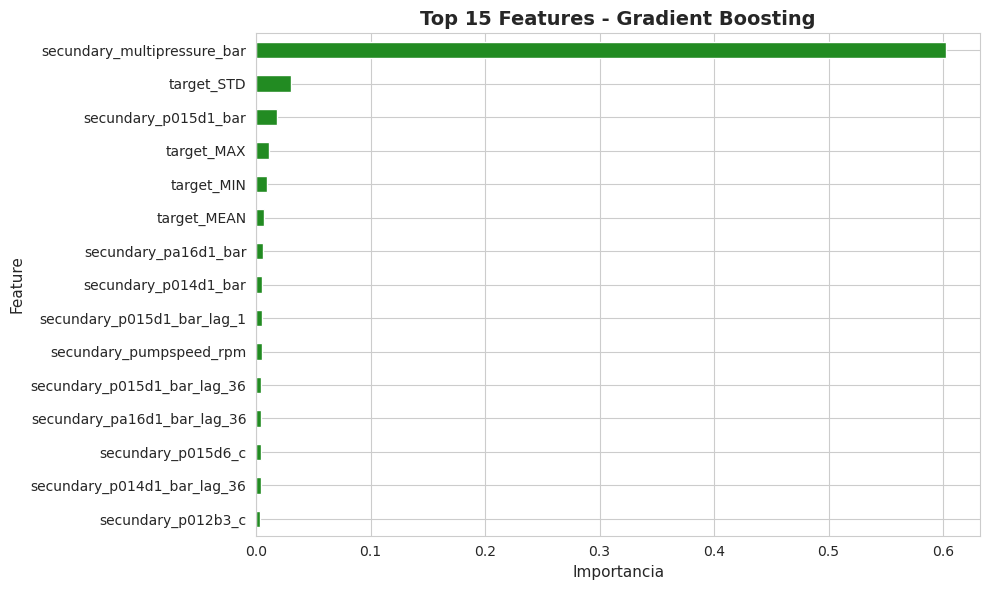

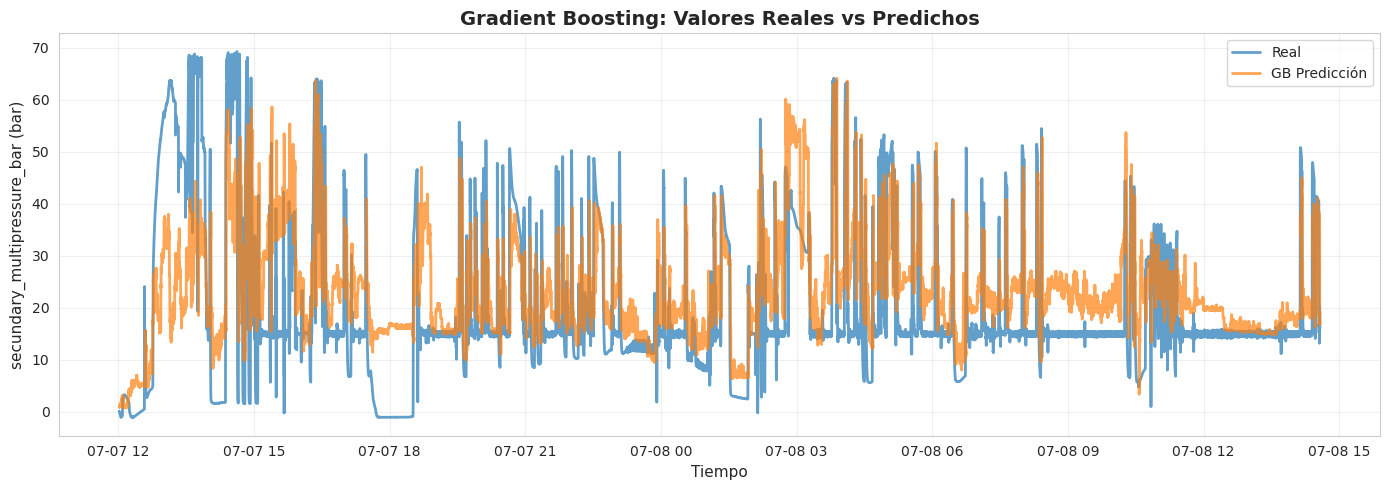

In [48]:

# 3. GRADIENT BOOSTING REGRESSOR
print("\n" + "=" * 80)
print("3. MODELO GRADIENT BOOSTING")
print("=" * 80)

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42,
    verbose=0
)

print("\nEntrenando Gradient Boosting...")
gb_model.fit(X_train_scaled, Y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

gb_metrics = create_metrics_summary(Y_test, y_pred_gb, "Gradient Boosting")

print(f"\n{'Métrica':<15} {'Valor':>12}")
print("-" * 30)
for key, value in gb_metrics.items():
    if key != 'Model':
        if isinstance(value, float):
            print(f"{key:<15} {value:>12.4f}")

# Feature importance
feature_importance_gb = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
feature_importance_gb.plot(kind='barh', color='forestgreen')
plt.title('Top 15 Features - Gradient Boosting', fontsize=14, fontweight='bold')
plt.xlabel('Importancia', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualización
plt.figure(figsize=(14, 5))
plt.plot(Y_test.index, Y_test.values, label='Real', linewidth=2, alpha=0.7)
plt.plot(Y_test.index, y_pred_gb, label='GB Predicción', linewidth=2, alpha=0.7)
plt.title('Gradient Boosting: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=11)
plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

En el gradient boosting hay una mejora muy pequeña al compararlo con el Random Forest a nivel de métricas, la importancia de las variables tampoco cambia significativamente. 

Visualmente, Gradient Boosting predice mejor los rangos de la variable a predecir cuando está estable entre 10-20 bar. La tendencia general sí la sigue el modelo, osea cual el valro real sube, la predicción sube, aunque no perfectamente. 


4. MODELO XGBOOST

Entrenando XGBoost...

Métrica                Valor
------------------------------
RMSE                 12.3139
MAE                   9.2279
R²                    0.3061
MAPE (%)            140.2698


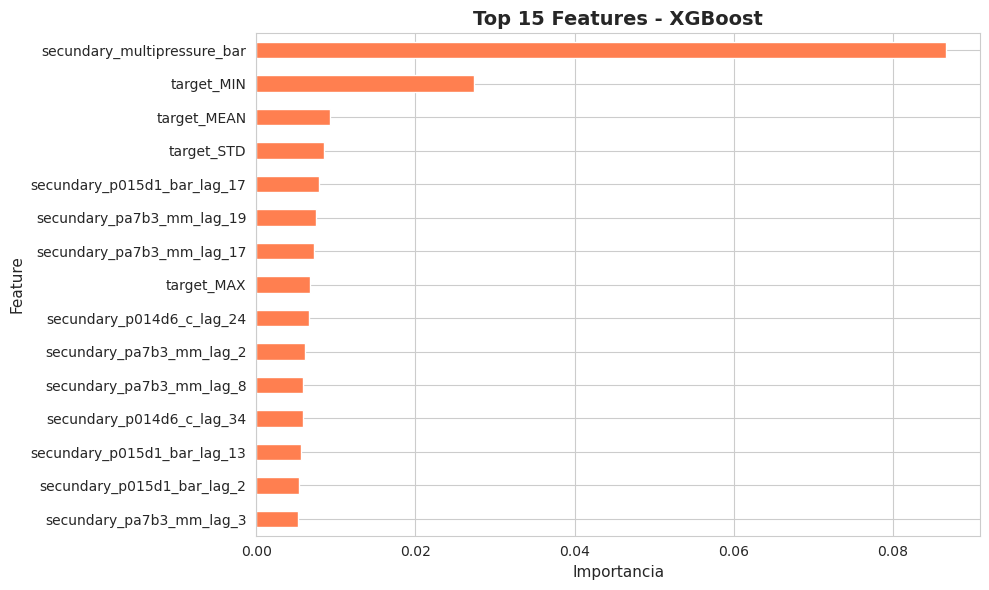

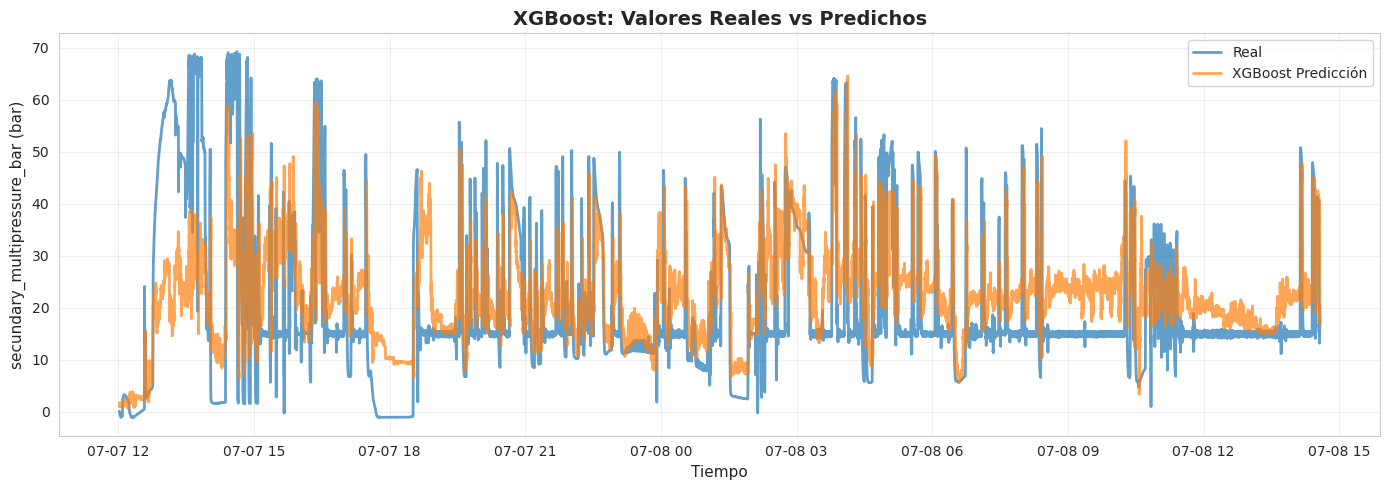

In [49]:

# 4. XGBOOST REGRESSOR
try:
    import xgboost as xgb
    
    print("\n" + "=" * 80)
    print("4. MODELO XGBOOST")
    print("=" * 80)
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0,
        tree_method='hist'
    )
    
    print("\nEntrenando XGBoost...")
    xgb_model.fit(X_train_scaled, Y_train, verbose=False)
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    
    xgb_metrics = create_metrics_summary(Y_test, y_pred_xgb, "XGBoost")
    
    print(f"\n{'Métrica':<15} {'Valor':>12}")
    print("-" * 30)
    for key, value in xgb_metrics.items():
        if key != 'Model':
            if isinstance(value, float):
                print(f"{key:<15} {value:>12.4f}")
    
    # Feature importance
    feature_importance_xgb = pd.Series(
        xgb_model.feature_importances_,
        index=X.columns
    ).sort_values(ascending=False).head(15)
    
    plt.figure(figsize=(10, 6))
    feature_importance_xgb.plot(kind='barh', color='coral')
    plt.title('Top 15 Features - XGBoost', fontsize=14, fontweight='bold')
    plt.xlabel('Importancia', fontsize=11)
    plt.ylabel('Feature', fontsize=11)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Visualización
    plt.figure(figsize=(14, 5))
    plt.plot(Y_test.index, Y_test.values, label='Real', linewidth=2, alpha=0.7)
    plt.plot(Y_test.index, y_pred_xgb, label='XGBoost Predicción', linewidth=2, alpha=0.7)
    plt.title('XGBoost: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
    plt.xlabel('Tiempo', fontsize=11)
    plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("XGBoost no instalado, saltando este modelo")

En las métricas, este modelo ha sido el mejor comparado con los anteriores, aunque la mejora no es tan significativa.

Vale la pena rescatar que en el gráfico de Top 15 Features, entran a escena variables que antes no estaban representadas y estas variables son las que se contruyeron en la sección del feature engineering. Esto puede interpretarse como que XGBoost está construyendo mucha más estructura compleja entre rolling windows y lags, está aprovechando lags medianos y largos, cosa que RF y GB NO pueden hacer bien.

# Resultados


COMPARACIÓN GENERAL DE MODELOS


            Model      RMSE       MAE        R²   MAPE (%)
          SARIMAX 25.438484 19.398707 -1.961307 496.638632
    Random Forest 12.627265  9.900889  0.270342 139.154701
Gradient Boosting 12.345058  9.263814  0.302591 184.880987
          XGBoost 12.313937  9.227894  0.306103 140.269802

--------------------------------------------------------------------------------
MEJOR MODELO POR MÉTRICA:
--------------------------------------------------------------------------------
RMSE           : XGBoost              = 12.3139
MAE            : XGBoost              = 9.2279
R²             : XGBoost              = 0.3061
MAPE (%)       : Random Forest        = 139.1547


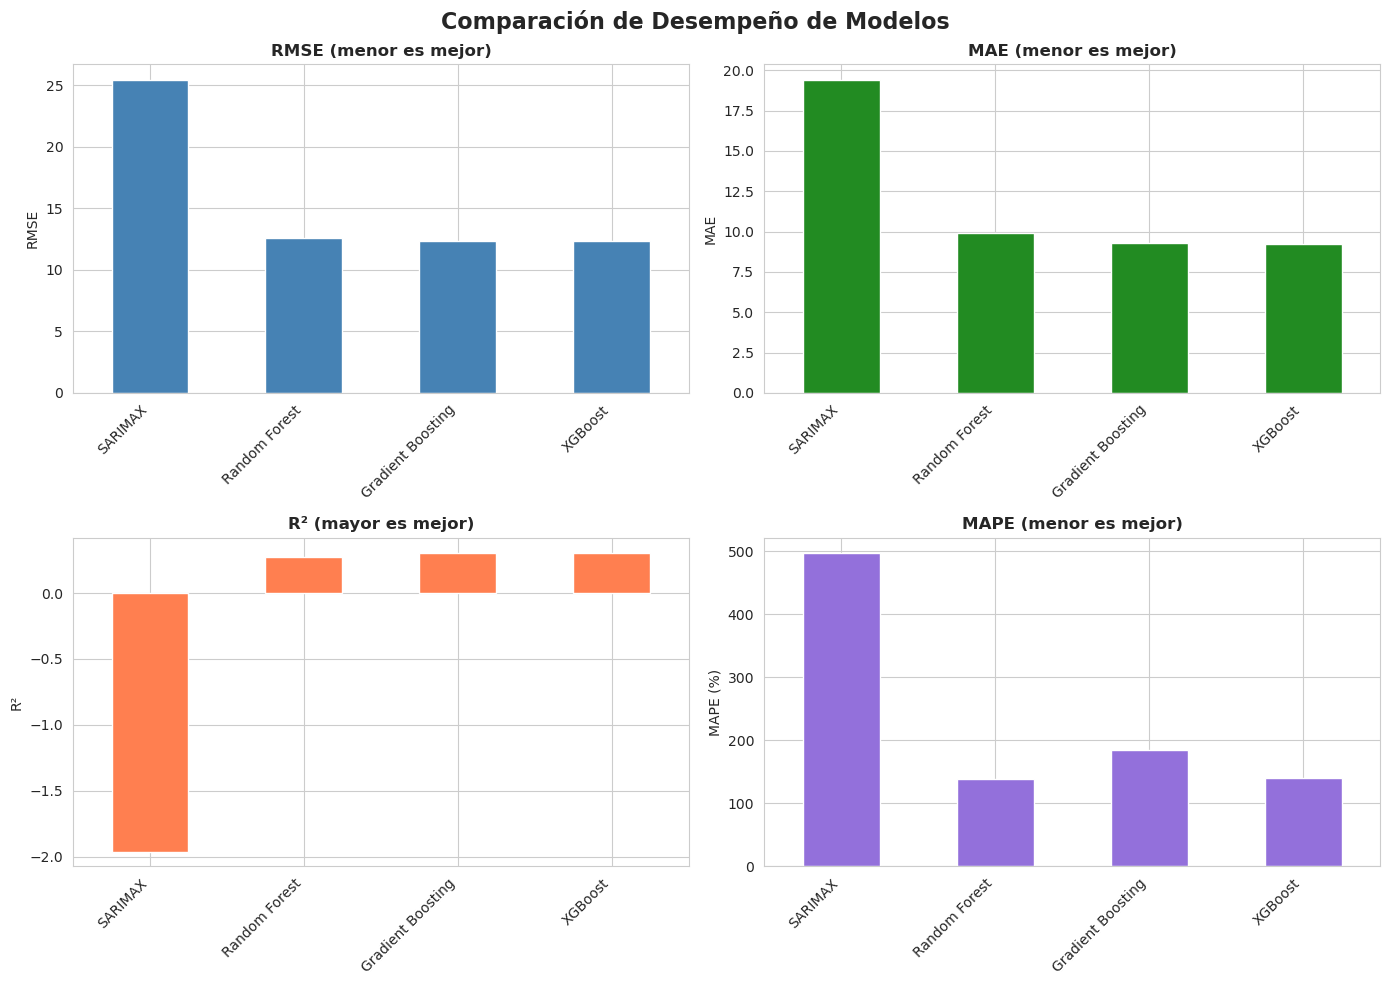

In [52]:

# COMPARACIÓN DE MODELOS
print("\n" + "=" * 80)
print("COMPARACIÓN GENERAL DE MODELOS")
print("=" * 80)

# Crear tabla comparativa
results_list = [sarimax_metrics, rf_metrics, gb_metrics]
try:
    results_list.append(xgb_metrics)
except:
    pass

results_df = pd.DataFrame(results_list)
print("\n")
print(results_df.to_string(index=False))

# Encontrar mejor modelo por cada métrica
print("\n" + "-" * 80)
print("MEJOR MODELO POR MÉTRICA:")
print("-" * 80)

metrics_cols = ['RMSE', 'MAE', 'R²', 'MAPE (%)']
for metric in metrics_cols:
    if metric == 'R²':  # Maximizar R²
        best_idx = results_df[metric].idxmax()
    else:  # Minimizar otros
        best_idx = results_df[metric].idxmin()
    
    best_model = results_df.loc[best_idx, 'Model']
    best_value = results_df.loc[best_idx, metric]
    print(f"{metric:<15}: {best_model:<20} = {best_value:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparación de Desempeño de Modelos', fontsize=16, fontweight='bold')

# RMSE
ax = axes[0, 0]
results_df.plot(x='Model', y='RMSE', kind='bar', ax=ax, color='steelblue', legend=False)
ax.set_title('RMSE (menor es mejor)', fontweight='bold')
ax.set_ylabel('RMSE')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# MAE
ax = axes[0, 1]
results_df.plot(x='Model', y='MAE', kind='bar', ax=ax, color='forestgreen', legend=False)
ax.set_title('MAE (menor es mejor)', fontweight='bold')
ax.set_ylabel('MAE')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# R²
ax = axes[1, 0]
results_df.plot(x='Model', y='R²', kind='bar', ax=ax, color='coral', legend=False)
ax.set_title('R² (mayor es mejor)', fontweight='bold')
ax.set_ylabel('R²')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# MAPE
ax = axes[1, 1]
results_df.plot(x='Model', y='MAPE (%)', kind='bar', ax=ax, color='mediumpurple', legend=False)
ax.set_title('MAPE (menor es mejor)', fontweight='bold')
ax.set_ylabel('MAPE (%)')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

A partir de esta comparación se puede concluir que:

- XGBoost es el mejor modelo, pero solo por un margen pequeño.
- Random Forest y GB están muy cerca.
- SARIMAX está completamente descartado.


ANÁLISIS DE RESIDUOS

Mejor modelo: XGBoost (R² = 0.3061)

Estadísticas de residuos:
  Media: -2.681821
  Desv. Est.: 12.018356
  Min: -47.564371
  Max: 61.057015


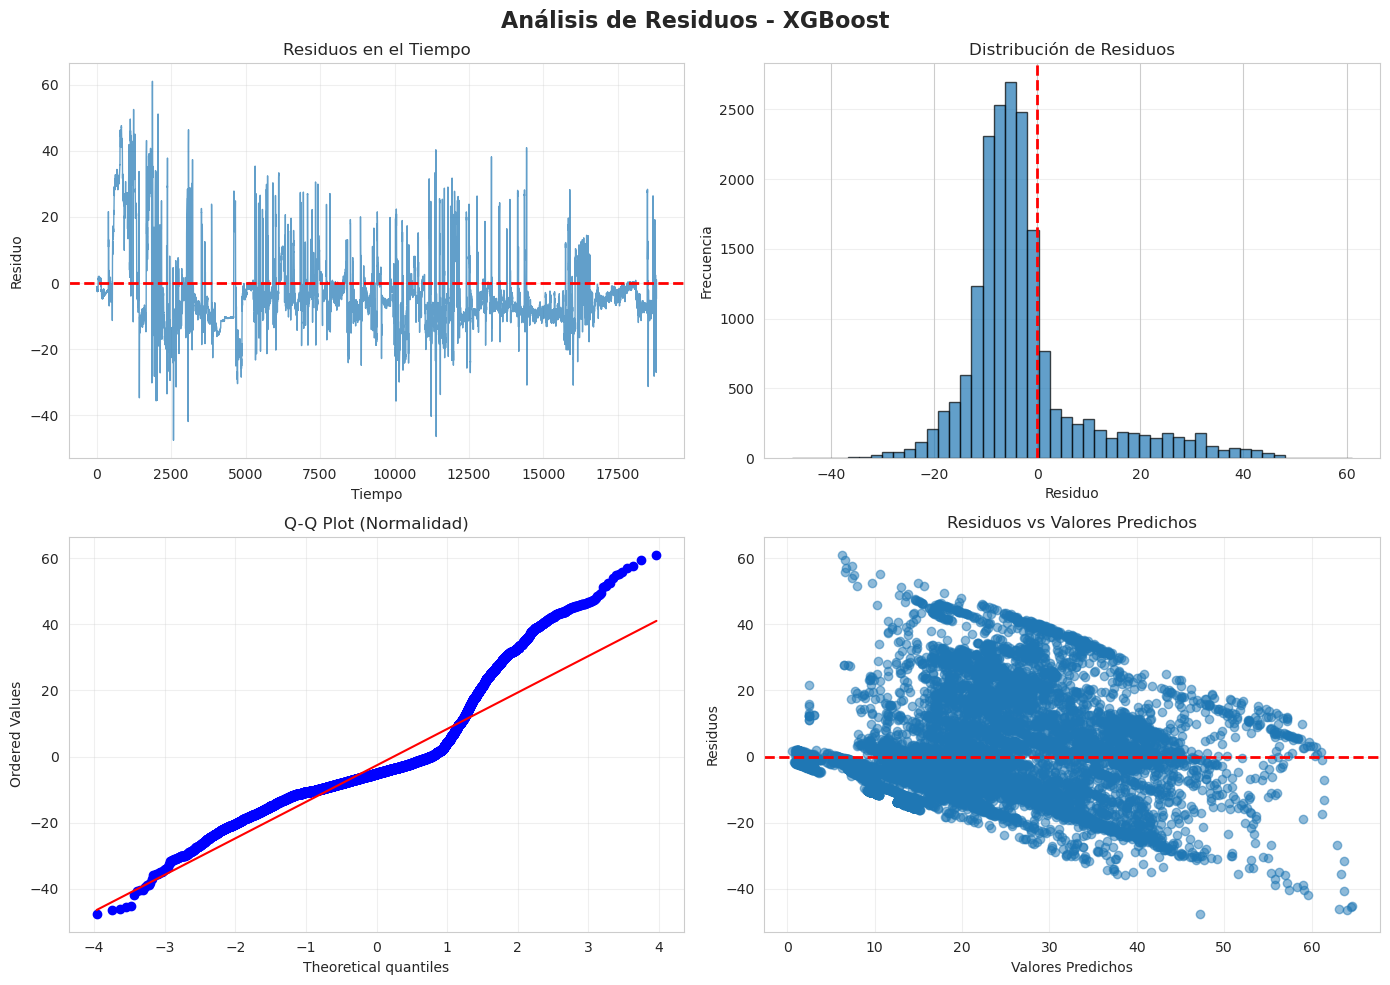

In [53]:

# ANÁLISIS DE RESIDUOS - MEJOR MODELO
print("\n" + "=" * 80)
print("ANÁLISIS DE RESIDUOS")
print("=" * 80)

# Identificar mejor modelo por R²
best_r2_idx = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_r2_idx, 'Model']

if best_model_name == 'SARIMAX':
    y_pred_best = y_pred_sarimax
    y_test_best = endog_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
    y_test_best = Y_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
elif best_model_name == 'Gradient Boosting':
    y_pred_best = y_pred_gb
    y_test_best = Y_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
else:  # XGBoost
    y_pred_best = y_pred_xgb
    y_test_best = Y_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")

# Calcular residuos
residuos = y_test_best.values - y_pred_best if hasattr(y_test_best, 'values') else y_test_best - y_pred_best

# Análisis estadístico de residuos
print(f"\nEstadísticas de residuos:")
print(f"  Media: {residuos.mean():.6f}")
print(f"  Desv. Est.: {residuos.std():.6f}")
print(f"  Min: {residuos.min():.6f}")
print(f"  Max: {residuos.max():.6f}")

# Visualización de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Análisis de Residuos - {best_model_name}', fontsize=16, fontweight='bold')

# Residuos en el tiempo
ax = axes[0, 0]
ax.plot(residuos, linewidth=1, alpha=0.7)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_title('Residuos en el Tiempo')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Residuo')
ax.grid(True, alpha=0.3)

# Histograma de residuos
ax = axes[0, 1]
ax.hist(residuos, bins=50, edgecolor='black', alpha=0.7)
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax.set_title('Distribución de Residuos')
ax.set_xlabel('Residuo')
ax.set_ylabel('Frecuencia')
ax.grid(True, alpha=0.3, axis='y')

# Q-Q plot
from scipy import stats
ax = axes[1, 0]
stats.probplot(residuos, dist="norm", plot=ax)
ax.set_title('Q-Q Plot (Normalidad)')
ax.grid(True, alpha=0.3)

# Residuos vs Predichos
ax = axes[1, 1]
ax.scatter(y_pred_best, residuos, alpha=0.5)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_title('Residuos vs Valores Predichos')
ax.set_xlabel('Valores Predichos')
ax.set_ylabel('Residuos')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad Shapiro-Wilk
if len(residuos) <= 5000:
    from scipy.stats import shapiro
    stat, p_value = shapiro(residuos)
    print(f"\nTest Shapiro-Wilk (normalidad de residuos):")
    print(f"  Estadístico: {stat:.6f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Resultado: {'Residuos son normales' if p_value > 0.05 else 'Residuos NO son normales'}")

**Residuos en el Tiempo**

En este gráfico se ve como los residuos se centran cerca de 0, sin embargo hay bloques o secciones donde hay residuos muy grandes. Por ejemplo entre t=0-2500 el modelo predice muy bajo, pero entre 2500-5000 el modelo predice muy alto. Lo cual parece que hay modos de operación que el modelo no está entendiendo bien.

**Distribución de Residuos**

Esta gráfica muestra la distribución, donde no parece que hayan outliers extremos, sin embargo, los residuos están sentrados en -2, por lo tanto el modelo predice un poco más alto del valor real. Además se evidencia una asimietría, con una cola grande a la derecha, es decir errores positivos grandes, y es evidente ya que se subestiman los picos.

**Residuos vs Valores Predichos** 

Cuando XGBoost predice valores bajos (~0–20), los residuos son pequeños.
=> El modelo sí entiende bien los niveles bajos.

Cuando predice valores medios, el residuo se dispersa.

Cuando predice valores altos (~40–60):
los residuos se vuelven fuertemente negativos
=> El modelo NUNCA predice picos tan altos como los reales.


VALIDACIÓN CRUZADA TEMPORAL (Time Series Split)

Realizando 5 splits temporales...

Fold 1: Train=15663, Test=15662
  RF R²: 0.3372 | GB R²: 0.3054 | SARIMAX R²: -1.1601
Fold 2: Train=31325, Test=15662
  RF R²: -0.0707 | GB R²: -0.2113 | SARIMAX R²: -28.9755
Fold 3: Train=46987, Test=15662
  RF R²: 0.4978 | GB R²: 0.5280 | SARIMAX R²: -0.6215
Fold 4: Train=62649, Test=15662
  RF R²: 0.4065 | GB R²: 0.3956 | SARIMAX R²: -1.1920
Fold 5: Train=78311, Test=15662
  RF R²: 0.3137 | GB R²: 0.3319 | SARIMAX R²: -21.0439

--------------------------------------------------------------------------------
RESUMEN DE VALIDACIÓN CRUZADA:
--------------------------------------------------------------------------------

Random Forest:
  Media R²: 0.2969 ± 0.2176

Gradient Boosting:
  Media R²: 0.2699 ± 0.2824

SARIMAX:
  Media R²: -10.5986 ± 13.4529


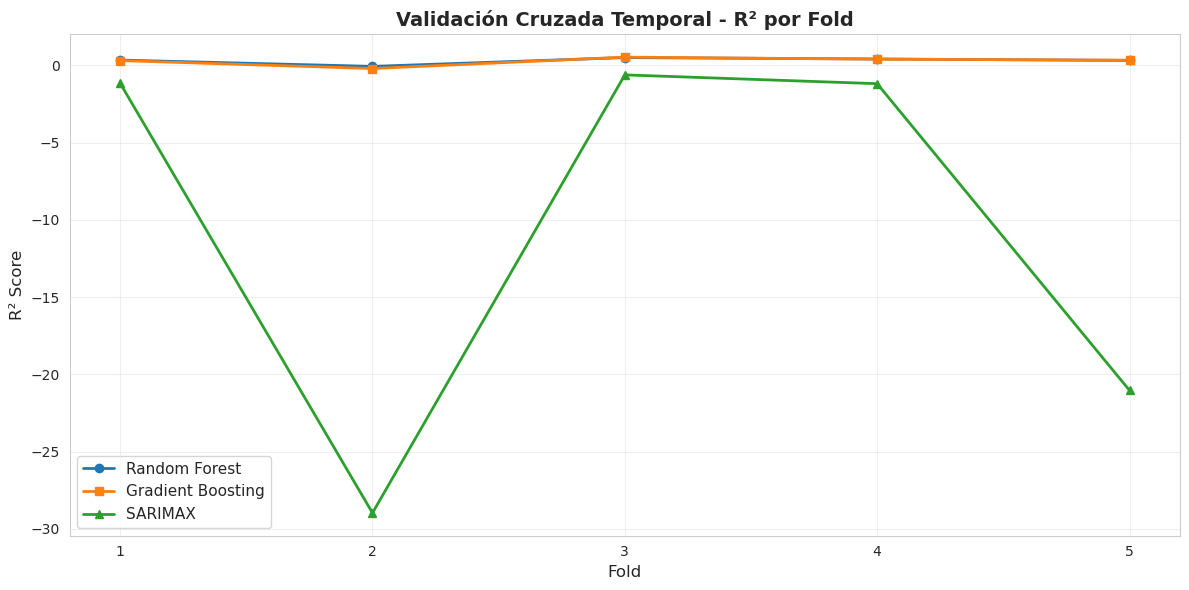

In [54]:

# VALIDACIÓN CRUZADA TEMPORAL
print("\n" + "=" * 80)
print("VALIDACIÓN CRUZADA TEMPORAL (Time Series Split)")
print("=" * 80)

# Usar TimeSeriesSplit para validación temporal
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

cv_results = {
    'fold': [],
    'train_size': [],
    'test_size': [],
    'rf_r2': [],
    'gb_r2': [],
    'sarimax_r2': []
}

print(f"\nRealizando {n_splits} splits temporales...\n")

fold_num = 0
for train_idx, test_idx in tscv.split(X):
    fold_num += 1
    
    X_cv_train, X_cv_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_cv_train, Y_cv_test = Y.iloc[train_idx], Y.iloc[test_idx]
    
    # Escalar
    scaler_cv = RobustScaler()
    X_cv_train_scaled = scaler_cv.fit_transform(X_cv_train)
    X_cv_test_scaled = scaler_cv.transform(X_cv_test)
    
    # Random Forest
    rf_cv = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1)
    rf_cv.fit(X_cv_train_scaled, Y_cv_train)
    y_pred_rf_cv = rf_cv.predict(X_cv_test_scaled)
    r2_rf_cv = r2_score(Y_cv_test, y_pred_rf_cv)
    
    # Gradient Boosting
    gb_cv = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
    gb_cv.fit(X_cv_train_scaled, Y_cv_train)
    y_pred_gb_cv = gb_cv.predict(X_cv_test_scaled)
    r2_gb_cv = r2_score(Y_cv_test, y_pred_gb_cv)
    
    # SARIMAX (simplificado para CV)
    try:
        model_cv = SARIMAX(Y_cv_train, exog=X_cv_train_scaled, order=(1,1,1), 
                          seasonal_order=(1,0,1,7), enforce_stationarity=False, 
                          enforce_invertibility=False)
        model_cv_fit = model_cv.fit(disp=False)
        forecast_cv = model_cv_fit.get_forecast(steps=len(Y_cv_test), exog=X_cv_test_scaled)
        y_pred_sarimax_cv = forecast_cv.predicted_mean.values
        r2_sarimax_cv = r2_score(Y_cv_test, y_pred_sarimax_cv)
    except:
        r2_sarimax_cv = np.nan
    
    cv_results['fold'].append(fold_num)
    cv_results['train_size'].append(len(train_idx))
    cv_results['test_size'].append(len(test_idx))
    cv_results['rf_r2'].append(r2_rf_cv)
    cv_results['gb_r2'].append(r2_gb_cv)
    cv_results['sarimax_r2'].append(r2_sarimax_cv)
    
    print(f"Fold {fold_num}: Train={len(train_idx)}, Test={len(test_idx)}")
    print(f"  RF R²: {r2_rf_cv:.4f} | GB R²: {r2_gb_cv:.4f} | SARIMAX R²: {r2_sarimax_cv:.4f}")

cv_df = pd.DataFrame(cv_results)

# Resumen CV
print("\n" + "-" * 80)
print("RESUMEN DE VALIDACIÓN CRUZADA:")
print("-" * 80)
print(f"\nRandom Forest:")
print(f"  Media R²: {cv_df['rf_r2'].mean():.4f} ± {cv_df['rf_r2'].std():.4f}")
print(f"\nGradient Boosting:")
print(f"  Media R²: {cv_df['gb_r2'].mean():.4f} ± {cv_df['gb_r2'].std():.4f}")
print(f"\nSARIMAX:")
print(f"  Media R²: {cv_df['sarimax_r2'].mean():.4f} ± {cv_df['sarimax_r2'].std():.4f}")

# Visualización CV
plt.figure(figsize=(12, 6))
plt.plot(cv_df['fold'], cv_df['rf_r2'], marker='o', label='Random Forest', linewidth=2)
plt.plot(cv_df['fold'], cv_df['gb_r2'], marker='s', label='Gradient Boosting', linewidth=2)
plt.plot(cv_df['fold'], cv_df['sarimax_r2'], marker='^', label='SARIMAX', linewidth=2)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Validación Cruzada Temporal - R² por Fold', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(cv_df['fold'])
plt.tight_layout()
plt.show()

En el análisis visual de la validación cruzada temporal se observa que el Random Forest mantiene un desempeño relativamente estable: su línea azul permanece entre valores de R² cercanos a 0.3 y 0.5 en la mayoría de los folds, aunque presenta una caída marcada en el fold 2, lo que sugiere un cambio de régimen operativo en el proceso.

El Gradient Boosting, representado por la línea naranja, muestra un comportamiento muy similar al Random Forest. En general, reproduce su estabilidad y también mejora ligeramente en el fold 3, aunque sufre una caída incluso más pronunciada que RF en el fold 2, lo que indica que ambos modelos comparten las mismas limitaciones frente a variaciones abruptas en la dinámica del sistema.

Por otro lado, SARIMAX exhibe un comportamiento completamente errático: la línea verde es caótica, sin seguir ninguna estructura discernible, con caídas extremas que alcanzan valores de R² entre –20 y –30. Esto evidencia que la naturaleza de la serie industrial —altamente no lineal, con picos abruptos y múltiples regímenes— resulta incompatible con modelos ARIMA o ARIMA-like, los cuales fallan de manera sistemática en capturar la complejidad del proceso.